# Introduction

For most financial institutions, such as banks and multi-finance companies, their main source of income is coming from their lending activities. By engaging in this activity, it means that lenders are exposed to the potential risk, where debtors stop repaying their loans, causing losses to the lenders. To mitigate this loss, lenders are expected to appropriately choose who are qualified for a loan, at what rate, and at what amount.

## Metadata

Here are some types of data that are useful in customer churn analysis:
* LN_ID: Loan ID
* TARGET: "Target variable (1 - client with late payment more than X days:  0 - all other cases)"
* CONTRACT_TYPE: Identification if loan is cash or revolving
* GENDER: Gender of the client
* NUM_CHILDREN: Number of children the client has
* INCOME: Monthly income of the client
* APPROVED_CREDIT: Approved credit amount of the loan
* ANNUITY: Loan annuity (amount that must be paid monthly)
* PRICE: For consumer loans it is the price of the goods for which the loan is given
* INCOME_TYPE: "Clients income type (businessman:  working:  maternity leave: …)"
* EDUCATION: The client highest education
* FAMILY_STATUS: Family status of the client
* HOUSING_TYPE: "What is the housing situation of the client (renting:  living with parents:  ...)"
* DAYS_AGE: Client's age in days at the time of application
* DAYS_WORK: How many days before the application the person started current job
* DAYS_REGISTRATION: How many days before the application did client change his registration
* DAYS_ID_CHANGE: How many days before the application did client change the identity document with which he applied for the loan
* WEEKDAYS_APPLY: On which day of the week did the client apply for the loan
* HOUR_APPLY: Approximately at what hour did the client apply for the loan
* ORGANIZATION_TYPE: Type of organization where client works
* EXT_SCORE_1: Normalized score from external data source
* EXT_SCORE_2: Normalized score from external data source
* EXT_SCORE_3: Normalized score from external data source

# Import Libraries

In [1]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install dalex
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.2 MB/s 
     |████████████████████████████████| 133 kB 41.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7ad0ff703b09ebdfaf48921057ff29811c8886d84c92dd6cc271b2f4e2c2a1bb
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which 

In [2]:
import pandas as pd
pd.set_option("display.max_columns",None)

import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}

import plotly.express as px
import pickle
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import *
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import *
from sklearn import svm,tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import model_selection

# load rulefit model
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# import dalex to explain complex model
import dalex as dx

# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

import os, random
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

# Data Load and Inspection

## Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd 'drive/My Drive/Colab Notebooks/dataset/Cermati'

/content/drive/My Drive/Colab Notebooks/dataset/Cermati


In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Cermati/app_train.csv')
data_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Cermati/app_test.csv")

In [6]:
data = pd.concat([data_train,data_test])

In [7]:
data

Unnamed: 0   LN_ID  TARGET    CONTRACT_TYPE GENDER  NUM_CHILDREN  \
0          201468  333538       0  Revolving loans      F             1   
1          264803  406644       0       Cash loans      F             1   
2          137208  259130       0       Cash loans      F             0   
3          269220  411997       0       Cash loans      M             0   
4          122096  241559       0  Revolving loans      M             0   
...           ...     ...     ...              ...    ...           ...   
14756       38250  144293       0       Cash loans      F             1   
14757      148422  272093       1       Cash loans      F             1   
14758      130286  251117       0       Cash loans      F             0   
14759      202131  334313       0       Cash loans      F             0   
14760      101569  217927       0       Cash loans      F             3   

         INCOME  APPROVED_CREDIT  ANNUITY     PRICE           INCOME_TYPE  \
0       67500.0         202500.0  10125.0  202500.0               Working   
1      202500.0         976711.5  49869.0  873000.0  Commercial associate   
2      180000.0         407520.0  25060.5  360000.0             Pensioner   
3      225000.0         808650.0  26086.5  675000.0         State servant   
4      135000.0         180000.0   9000.0  180000.0  Commercial associate   
...         ...              ...      ...       ...                   ...   
14756   67500.0         112500.0   7317.0  112500.0               Working   
14757  135000.0         313438.5  21073.5  283500.0               Working   
14758  157500.0        1078200.0  31522.5  900000.0         State servant   
14759  216000.0         272520.0  21658.5  225000.0             Pensioner   
14760  112500.0         260640.0  20299.5  225000.0               Working   

                           EDUCATION         FAMILY_STATUS       HOUSING_TYPE  \
0      Secondary / secondary special               Married       With parents   
1      Secondary / secondary special               Married  House / apartment   
2      Secondary / secondary special               Married  House / apartment   
3                   Higher education               Married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
14756  Secondary / secondary special               Married  House / apartment   
14757  Secondary / secondary special        Civil marriage       With parents   
14758               Higher education             Separated  House / apartment   
14759  Secondary / secondary special                 Widow  House / apartment   
14760  Secondary / secondary special             Separated  House / apartment   

       DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_ID_CHANGE WEEKDAYS_APPLY  \
0        -11539       -921             -119.0           -2757        TUESDAY   
1        -15743      -4482            -1797.0           -2455        TUESDAY   
2        -20775     365243            -8737.0           -4312       THURSDAY   
3        -20659     -10455            -4998.0           -4010      WEDNESDAY   
4         -9013      -1190            -3524.0           -1644         SUNDAY   
...         ...        ...                ...             ...            ...   
14756    -12866      -3154            -1251.0           -4395        TUESDAY   
14757    -11421      -3962            -5247.0           -3795       SATURDAY   
14758    -13313      -2258            -3899.0           -4515         MONDAY   
14759    -24085     365243            -9354.0           -4740       THURSDAY   
14760    -12782       -387            -1261.0           -4823       THURSDAY   

       HOUR_APPLY       ORGANIZATION_TYPE  EXT_SCORE_1  EXT_SCORE_2  \
0              18  Business Entity Type 3     0.572805     0.608276   
1              14                   Other     0.655600     0.684298   
2              14                 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76264 entries, 0 to 14760
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         76264 non-null  int64  
 1   LN_ID              76264 non-null  int64  
 2   TARGET             76264 non-null  int64  
 3   CONTRACT_TYPE      76264 non-null  object 
 4   GENDER             76264 non-null  object 
 5   NUM_CHILDREN       76264 non-null  int64  
 6   INCOME             76264 non-null  float64
 7   APPROVED_CREDIT    76264 non-null  float64
 8   ANNUITY            76263 non-null  float64
 9   PRICE              76182 non-null  float64
 10  INCOME_TYPE        76264 non-null  object 
 11  EDUCATION          76264 non-null  object 
 12  FAMILY_STATUS      76264 non-null  object 
 13  HOUSING_TYPE       76264 non-null  object 
 14  DAYS_AGE           76264 non-null  int64  
 15  DAYS_WORK          76264 non-null  int64  
 16  DAYS_REGISTRATION  762

In [9]:
# extracting categorical columns
cat = data.select_dtypes(include = ['category'])

# printing unique values of each column
for col in cat.columns:
    print(f"{col}: \n{cat[col].unique()}\n")

## Data Transformation

### Missing Values Handling

In [10]:
data.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   82
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          43157
EXT_SCORE_2            153
EXT_SCORE_3          15158
dtype: int64

In [11]:
data=data.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [12]:
data.isnull().sum()

Unnamed: 0           0
LN_ID                0
TARGET               0
CONTRACT_TYPE        0
GENDER               0
NUM_CHILDREN         0
INCOME               0
APPROVED_CREDIT      0
ANNUITY              0
PRICE                0
INCOME_TYPE          0
EDUCATION            0
FAMILY_STATUS        0
HOUSING_TYPE         0
DAYS_AGE             0
DAYS_WORK            0
DAYS_REGISTRATION    0
DAYS_ID_CHANGE       0
WEEKDAYS_APPLY       0
HOUR_APPLY           0
ORGANIZATION_TYPE    0
EXT_SCORE_1          0
EXT_SCORE_2          0
EXT_SCORE_3          0
dtype: int64

The dataset has no missing values.

In [13]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", data.shape)
print("")

# Data Info
print("Data info :")
print(data.info())
print("")

# Data duplication
print("Data duplication :")
print(data.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (27075, 24)

Data info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 4 to 14756
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         27075 non-null  int64  
 1   LN_ID              27075 non-null  int64  
 2   TARGET             27075 non-null  int64  
 3   CONTRACT_TYPE      27075 non-null  object 
 4   GENDER             27075 non-null  object 
 5   NUM_CHILDREN       27075 non-null  int64  
 6   INCOME             27075 non-null  float64
 7   APPROVED_CREDIT    27075 non-null  float64
 8   ANNUITY            27075 non-null  float64
 9   PRICE              27075 non-null  float64
 10  INCOME_TYPE        27075 non-null  object 
 11  EDUCATION          27075 non-null  object 
 12  FAMILY_STATUS      27075 non-null  object 
 13  HOUSING_TYPE       27075 non-null  object 
 14  DAYS_AGE           27075 non-null  int64  

### Converting Format

In [14]:
# Converting the Day_Birth into Age by dividing by 365
data['AGE'] = round ( -1*(data['DAYS_AGE']/365)  )

In [15]:
# Converting the Day_Birth into Age by dividing by 365
data['WORK_EXP'] = round ((data['DAYS_WORK']/365)  )

In [16]:
# Converting the Day_Birth into Age by dividing by 365
data['REGISTRATION'] = round ( -1*(data['DAYS_REGISTRATION']/365)  )

In [17]:
# Converting the Day_Birth into Age by dividing by 365
data['ID_CHANGE'] = round ( -1*(data['DAYS_ID_CHANGE']/365)  )

### Change Definition

In [18]:
# Change Definition of Education
data['EDUCATION'] = data['EDUCATION'].replace({'Secondary / secondary special':'High School Students', 'Higher education':'University Students', 'Incomplete higher':'University Students', 'Academic degree':'University Students', 'Lower secondary':'High School Students'})

In [19]:
# Change Definition of Family Status
data['FAMILY_STATUS'] = data['FAMILY_STATUS'].replace({'Single / not married':'Single', 'Married':'Married', 'Civil marriage':'Married', 'Separated':'Single', 'Widow':'Single'})

In [20]:
# Change Definition of Housing Type
data['HOUSING_TYPE'] = data['HOUSING_TYPE'].replace({'House / apartment':'Private Property', 'With parents':'Private Property', 'Municipal apartment':'Non-Private Property', 'Rented apartment':'Non-Private Property', 'Office apartment':'Non-Private Property', 'Co-op apartment':'Non-Private Property'})

In [21]:
# Change Definition of Housing Type
data['INCOME_TYPE'] = data['INCOME_TYPE'].replace({'Commercial associate':'Worker', 'Working':'Worker', 'State servant':'Worker'})

## Data Inspection

Finding categorical features and converting their pandas *dtype* to `categorical` will ease visualization

In [22]:
def summarize_categoricals(data, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[data[c].unique(), len(data[c].unique()), data[c].isnull().sum()] for c in data.columns]
    data_temp = pd.DataFrame(data, index=data.columns,
                           columns=['Levels', 'No. of Levels',
                                    'No. of Missing Values'])
    return data_temp.iloc[:, 0 if show_levels else 1:]


def return_categoricals(data, threshold=5):
    """
        Returns a list of columns that have less than or equal to
        `threshold` number of unique categorical levels
    """
    return list(filter(lambda c: c if len(data[c].unique()) <= threshold else None,
                       data.columns))


def to_categorical(columns, data):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        data[col] = data[col].astype('category')
    return data

In [23]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", data.shape)
print("")

# Data Info
print("Data info :")
print(data.info())
print("")

# Data duplication
print("Data duplication :")
print(data.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (27075, 28)

Data info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 4 to 14756
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         27075 non-null  int64  
 1   LN_ID              27075 non-null  int64  
 2   TARGET             27075 non-null  int64  
 3   CONTRACT_TYPE      27075 non-null  object 
 4   GENDER             27075 non-null  object 
 5   NUM_CHILDREN       27075 non-null  int64  
 6   INCOME             27075 non-null  float64
 7   APPROVED_CREDIT    27075 non-null  float64
 8   ANNUITY            27075 non-null  float64
 9   PRICE              27075 non-null  float64
 10  INCOME_TYPE        27075 non-null  object 
 11  EDUCATION          27075 non-null  object 
 12  FAMILY_STATUS      27075 non-null  object 
 13  HOUSING_TYPE       27075 non-null  object 
 14  DAYS_AGE           27075 non-null  int64  

In [24]:
for col in ['ORGANIZATION_TYPE', 'WEEKDAYS_APPLY', 'HOUSING_TYPE', 'INCOME_TYPE','CONTRACT_TYPE','GENDER','EDUCATION','FAMILY_STATUS']:
    data[col] = data[col].astype('category')

In [25]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'category':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

Columns  Unique
7  ORGANIZATION_TYPE      58
6     WEEKDAYS_APPLY       7
2        INCOME_TYPE       5
0      CONTRACT_TYPE       2
1             GENDER       2
3          EDUCATION       2
4      FAMILY_STATUS       2
5       HOUSING_TYPE       2

In [26]:
# Now we will convert them from 'int' to 'float' type
# using pandas.to_numeric()
data['TARGET'] = pd.to_numeric(data['TARGET'], downcast='float')
data['NUM_CHILDREN'] = pd.to_numeric(data['NUM_CHILDREN'], downcast='float')
data['DAYS_AGE'] = pd.to_numeric(data['DAYS_AGE'], downcast='float')
data['DAYS_WORK'] = pd.to_numeric(data['DAYS_WORK'], downcast='float')
data['DAYS_ID_CHANGE'] = pd.to_numeric(data['DAYS_ID_CHANGE'], downcast='float')
data['HOUR_APPLY'] = pd.to_numeric(data['HOUR_APPLY'], downcast='float')

## Droping The Unused Data

In [27]:
data = data.drop(['LN_ID','Unnamed: 0'], axis=1)

In [28]:
data = data.drop(['DAYS_AGE','DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE','ORGANIZATION_TYPE'], axis=1)

In [29]:
data

TARGET    CONTRACT_TYPE GENDER  NUM_CHILDREN    INCOME  \
4         0.0  Revolving loans      M           0.0  135000.0   
5         0.0       Cash loans      F           2.0  135000.0   
7         0.0       Cash loans      F           0.0  112500.0   
8         0.0       Cash loans      F           1.0  112500.0   
9         0.0       Cash loans      F           1.0  112500.0   
...       ...              ...    ...           ...       ...   
14744     0.0       Cash loans      M           0.0  315000.0   
14745     0.0       Cash loans      F           0.0  126000.0   
14747     0.0  Revolving loans      M           0.0  157500.0   
14750     0.0  Revolving loans      F           0.0   45000.0   
14756     0.0       Cash loans      F           1.0   67500.0   

       APPROVED_CREDIT  ANNUITY     PRICE INCOME_TYPE             EDUCATION  \
4             180000.0   9000.0  180000.0      Worker  High School Students   
5             592560.0  32274.0  450000.0      Worker   University Students   
7             562500.0  16578.0  562500.0      Worker   University Students   
8             360000.0  17509.5  360000.0      Worker  High School Students   
9             512446.5  34375.5  463500.0      Worker  High School Students   
...                ...      ...       ...         ...                   ...   
14744         225000.0  23755.5  225000.0      Worker  High School Students   
14745         263686.5  28525.5  238500.0      Worker  High School Students   
14747         337500.0  16875.0  337500.0      Worker   University Students   
14750         135000.0   6750.0  135000.0      Worker   University Students   
14756         112500.0   7317.0  112500.0      Worker  High School Students   

      FAMILY_STATUS      HOUSING_TYPE WEEKDAYS_APPLY  HOUR_APPLY  EXT_SCORE_1  \
4            Single  Private Property         SUNDAY        11.0     0.175511   
5           Married  Private Property      WEDNESDAY         9.0     0.117463   
7           Married  Private Property        TUESDAY        16.0     0.570466   
8           Married  Private Property         MONDAY        12.0     0.407390   
9           Married  Private Property        TUESDAY        16.0     0.310480   
...             ...               ...            ...         ...          ...   
14744       Married  Private Property      WEDNESDAY        10.0     0.184000   
14745       Married  Private Property         MONDAY        12.0     0.504087   
14747       Married  Private Property      WEDNESDAY        11.0     0.887527   
14750       Married  Private Property       SATURDAY        10.0     0.770063   
14756       Married  Private Property        TUESDAY        10.0     0.570305   

       EXT_SCORE_2  EXT_SCORE_3   AGE  WORK_EXP  REGISTRATION  ID_CHANGE  
4         0.492994     0.085595  25.0      -3.0          10.0        5.0  
5         0.621860     0.579727  29.0      -2.0           0.0        0.0  
7         0.416949     0.590233  46.0      -4.0          19.0        1.0  
8         0.452447     0.321735  27.0      -2.0           5.0        2.0  
9         0.642651     0.466864  28.0      -1.0           4.0        8.0  
...            ...          ...   ...       ...           ...        ...  
14744     0.470237     0.468660  28.0      -3.0           0.0        8.0  
14745     0.551037     0.273565  44.0      -1.0          24.0        3.0  
14747     0.727850     0.590233  62.0      -9.0          11.0       13.0  
14750     0.583092     0.709189  53.0      -0.0          19.0        8.0  
14756     0.399628     0.586740  35.0      -9.0           3.0       12.0  

[27075 rows x 21 columns]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 4 to 14756
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TARGET           27075 non-null  float32 
 1   CONTRACT_TYPE    27075 non-null  category
 2   GENDER           27075 non-null  category
 3   NUM_CHILDREN     27075 non-null  float32 
 4   INCOME           27075 non-null  float64 
 5   APPROVED_CREDIT  27075 non-null  float64 
 6   ANNUITY          27075 non-null  float64 
 7   PRICE            27075 non-null  float64 
 8   INCOME_TYPE      27075 non-null  category
 9   EDUCATION        27075 non-null  category
 10  FAMILY_STATUS    27075 non-null  category
 11  HOUSING_TYPE     27075 non-null  category
 12  WEEKDAYS_APPLY   27075 non-null  category
 13  HOUR_APPLY       27075 non-null  float32 
 14  EXT_SCORE_1      27075 non-null  float64 
 15  EXT_SCORE_2      27075 non-null  float64 
 16  EXT_SCORE_3      27075 non-null  float64

In [31]:
# extracting categorical columns
cat = data.select_dtypes(include = ['category'])

# printing unique values of each column
for col in cat.columns:
    print(f"{col}: \n{cat[col].unique()}\n")

CONTRACT_TYPE: 
['Revolving loans', 'Cash loans']
Categories (2, object): ['Cash loans', 'Revolving loans']

GENDER: 
['M', 'F']
Categories (2, object): ['F', 'M']

INCOME_TYPE: 
['Worker', 'Pensioner', 'Student', 'Businessman', 'Unemployed']
Categories (5, object): ['Businessman', 'Pensioner', 'Student', 'Unemployed', 'Worker']

EDUCATION: 
['High School Students', 'University Students']
Categories (2, object): ['High School Students', 'University Students']

FAMILY_STATUS: 
['Single', 'Married']
Categories (2, object): ['Married', 'Single']

HOUSING_TYPE: 
['Private Property', 'Non-Private Property']
Categories (2, object): ['Non-Private Property', 'Private Property']

WEEKDAYS_APPLY: 
['SUNDAY', 'WEDNESDAY', 'TUESDAY', 'MONDAY', 'SATURDAY', 'THURSDAY', 'FRIDAY']
Categories (7, object): ['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY',
                         'WEDNESDAY']



##  Data Correlation

In [32]:
data.describe().T

count           mean            std           min  \
TARGET           27075.0       0.072355       0.259079      0.000000   
NUM_CHILDREN     27075.0       0.506556       0.757996      0.000000   
INCOME           27075.0  178989.913463   98698.099222  27000.000000   
APPROVED_CREDIT  27075.0  625314.627091  419271.160912  45000.000000   
ANNUITY          27075.0   28279.273463   14933.523306   2857.500000   
PRICE            27075.0  563345.539778  385633.633771  45000.000000   
HOUR_APPLY       27075.0      12.197821       3.273494      0.000000   
EXT_SCORE_1      27075.0       0.510821       0.209459      0.017095   
EXT_SCORE_2      27075.0       0.529372       0.181810      0.000013   
EXT_SCORE_3      27075.0       0.497044       0.194276      0.000527   
AGE              27075.0      40.680813      10.695248     21.000000   
WORK_EXP         27075.0      93.332521     300.842570    -46.000000   
REGISTRATION     27075.0      12.388107       8.848348      0.000000   
ID_CHANGE        27075.0       8.163878       4.133439      0.000000   

                           25%            50%            75%           max  
TARGET                0.000000       0.000000       0.000000  1.000000e+00  
NUM_CHILDREN          0.000000       0.000000       1.000000  8.000000e+00  
INCOME           112500.000000  157500.000000  225000.000000  2.250000e+06  
APPROVED_CREDIT  284400.000000  528633.000000  835605.000000  4.050000e+06  
ANNUITY           17325.000000   26086.500000   36218.250000  2.580255e+05  
PRICE            247500.000000  454500.000000  706500.000000  4.050000e+06  
HOUR_APPLY           10.000000      12.000000      15.000000  2.300000e+01  
EXT_SCORE_1           0.345066       0.517677       0.682439  9.516240e-01  
EXT_SCORE_2           0.425685       0.577366       0.667703  8.549997e-01  
EXT_SCORE_3           0.353988       0.517297       0.654529  8.825303e-01  
AGE                  32.000000      39.000000      48.000000  6.900000e+01  
WORK_EXP             -8.000000      -4.000000      -1.000000  1.001000e+03  
REGISTRATION          5.000000      11.000000      18.000000  6.000000e+01  
ID_CHANGE             5.000000       9.000000      12.000000  1.700000e+01

### Correlation between Quantitative Variables

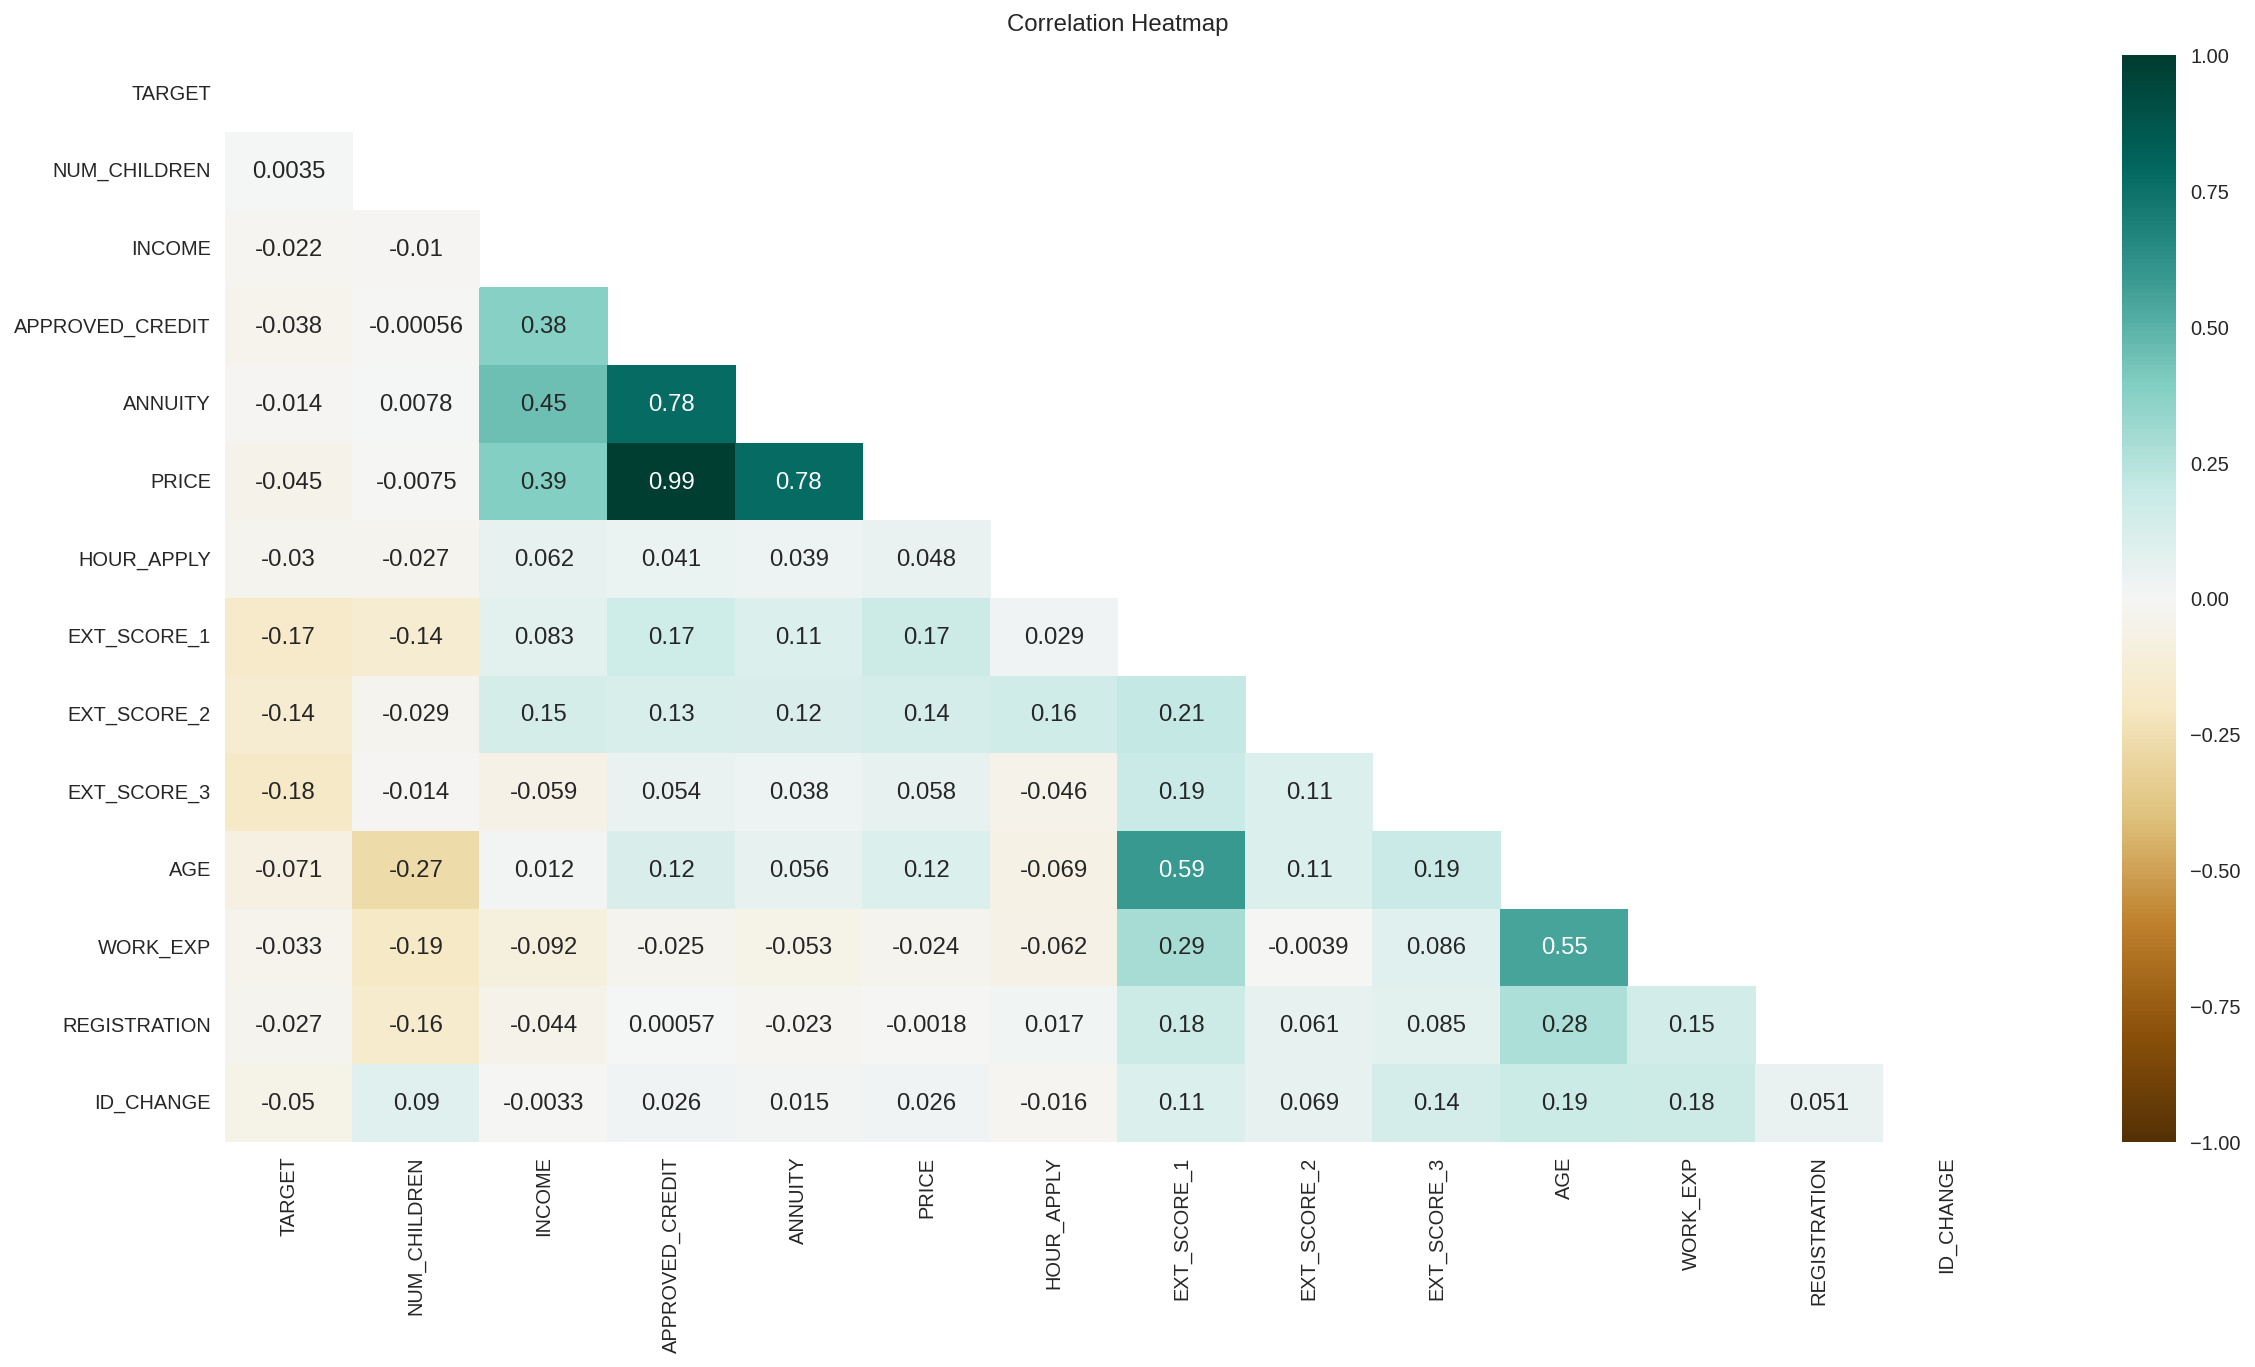

In [33]:
# Increase the size of the heatmap
plt.figure(figsize=(20,10))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

***Inference:*** Only follow-up period is highly correlated to fraudulance relative to other features.

### Correlation between Qualitative/ Categorical Variables

`Cramer's V` is more appropriate than Pearson correlation to find correlation between two nominal variables. Here, the `Cramer's V` metric is implemented.

In [34]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    
    try:
        chi2 = chi2_contingency(contingency_table)[0]
    except ValueError:
        return np.NaN
    
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [35]:
def categorical_corr_matrix(data):
    """
        Computes corrected Cramer's V statistic between all the
        categorical variables in the dataframe
    """
    data = data.select_dtypes(include='category')
    cols = data.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    excluded_cols = list()
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            data_crosstab = pd.crosstab(data[col1], data[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(data_crosstab)
                
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

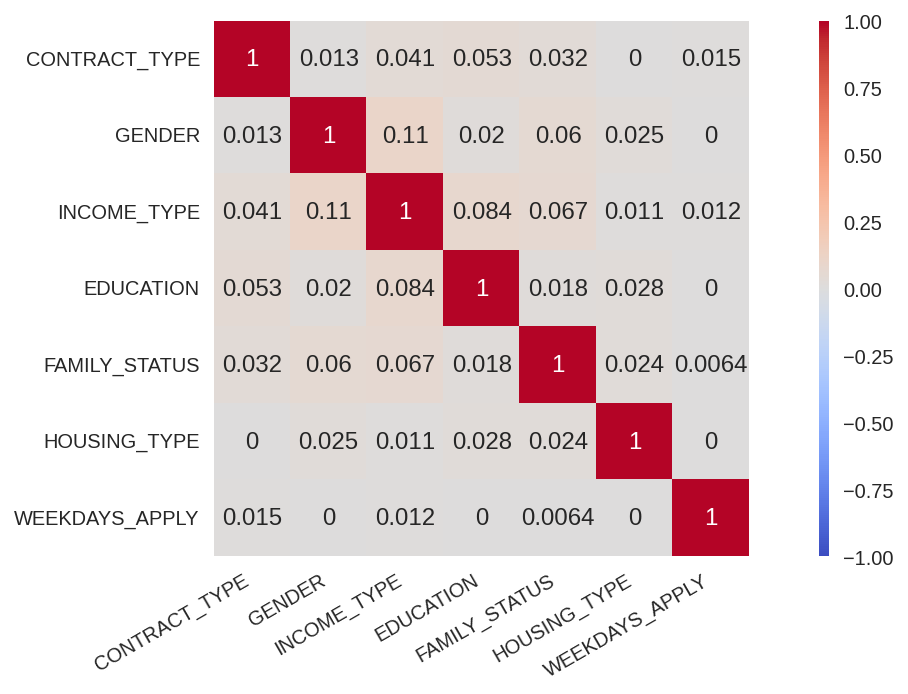

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(categorical_corr_matrix(data), annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

# Exploratory Data Analysis

## Frequency Distribution: Categorical Variables

In [45]:
target = data['TARGET'].value_counts()

fig = px.pie(target, 
             values = target.values, 
             names = target.index)
fig.update_traces(textposition='inside', textinfo='percent+label+value', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

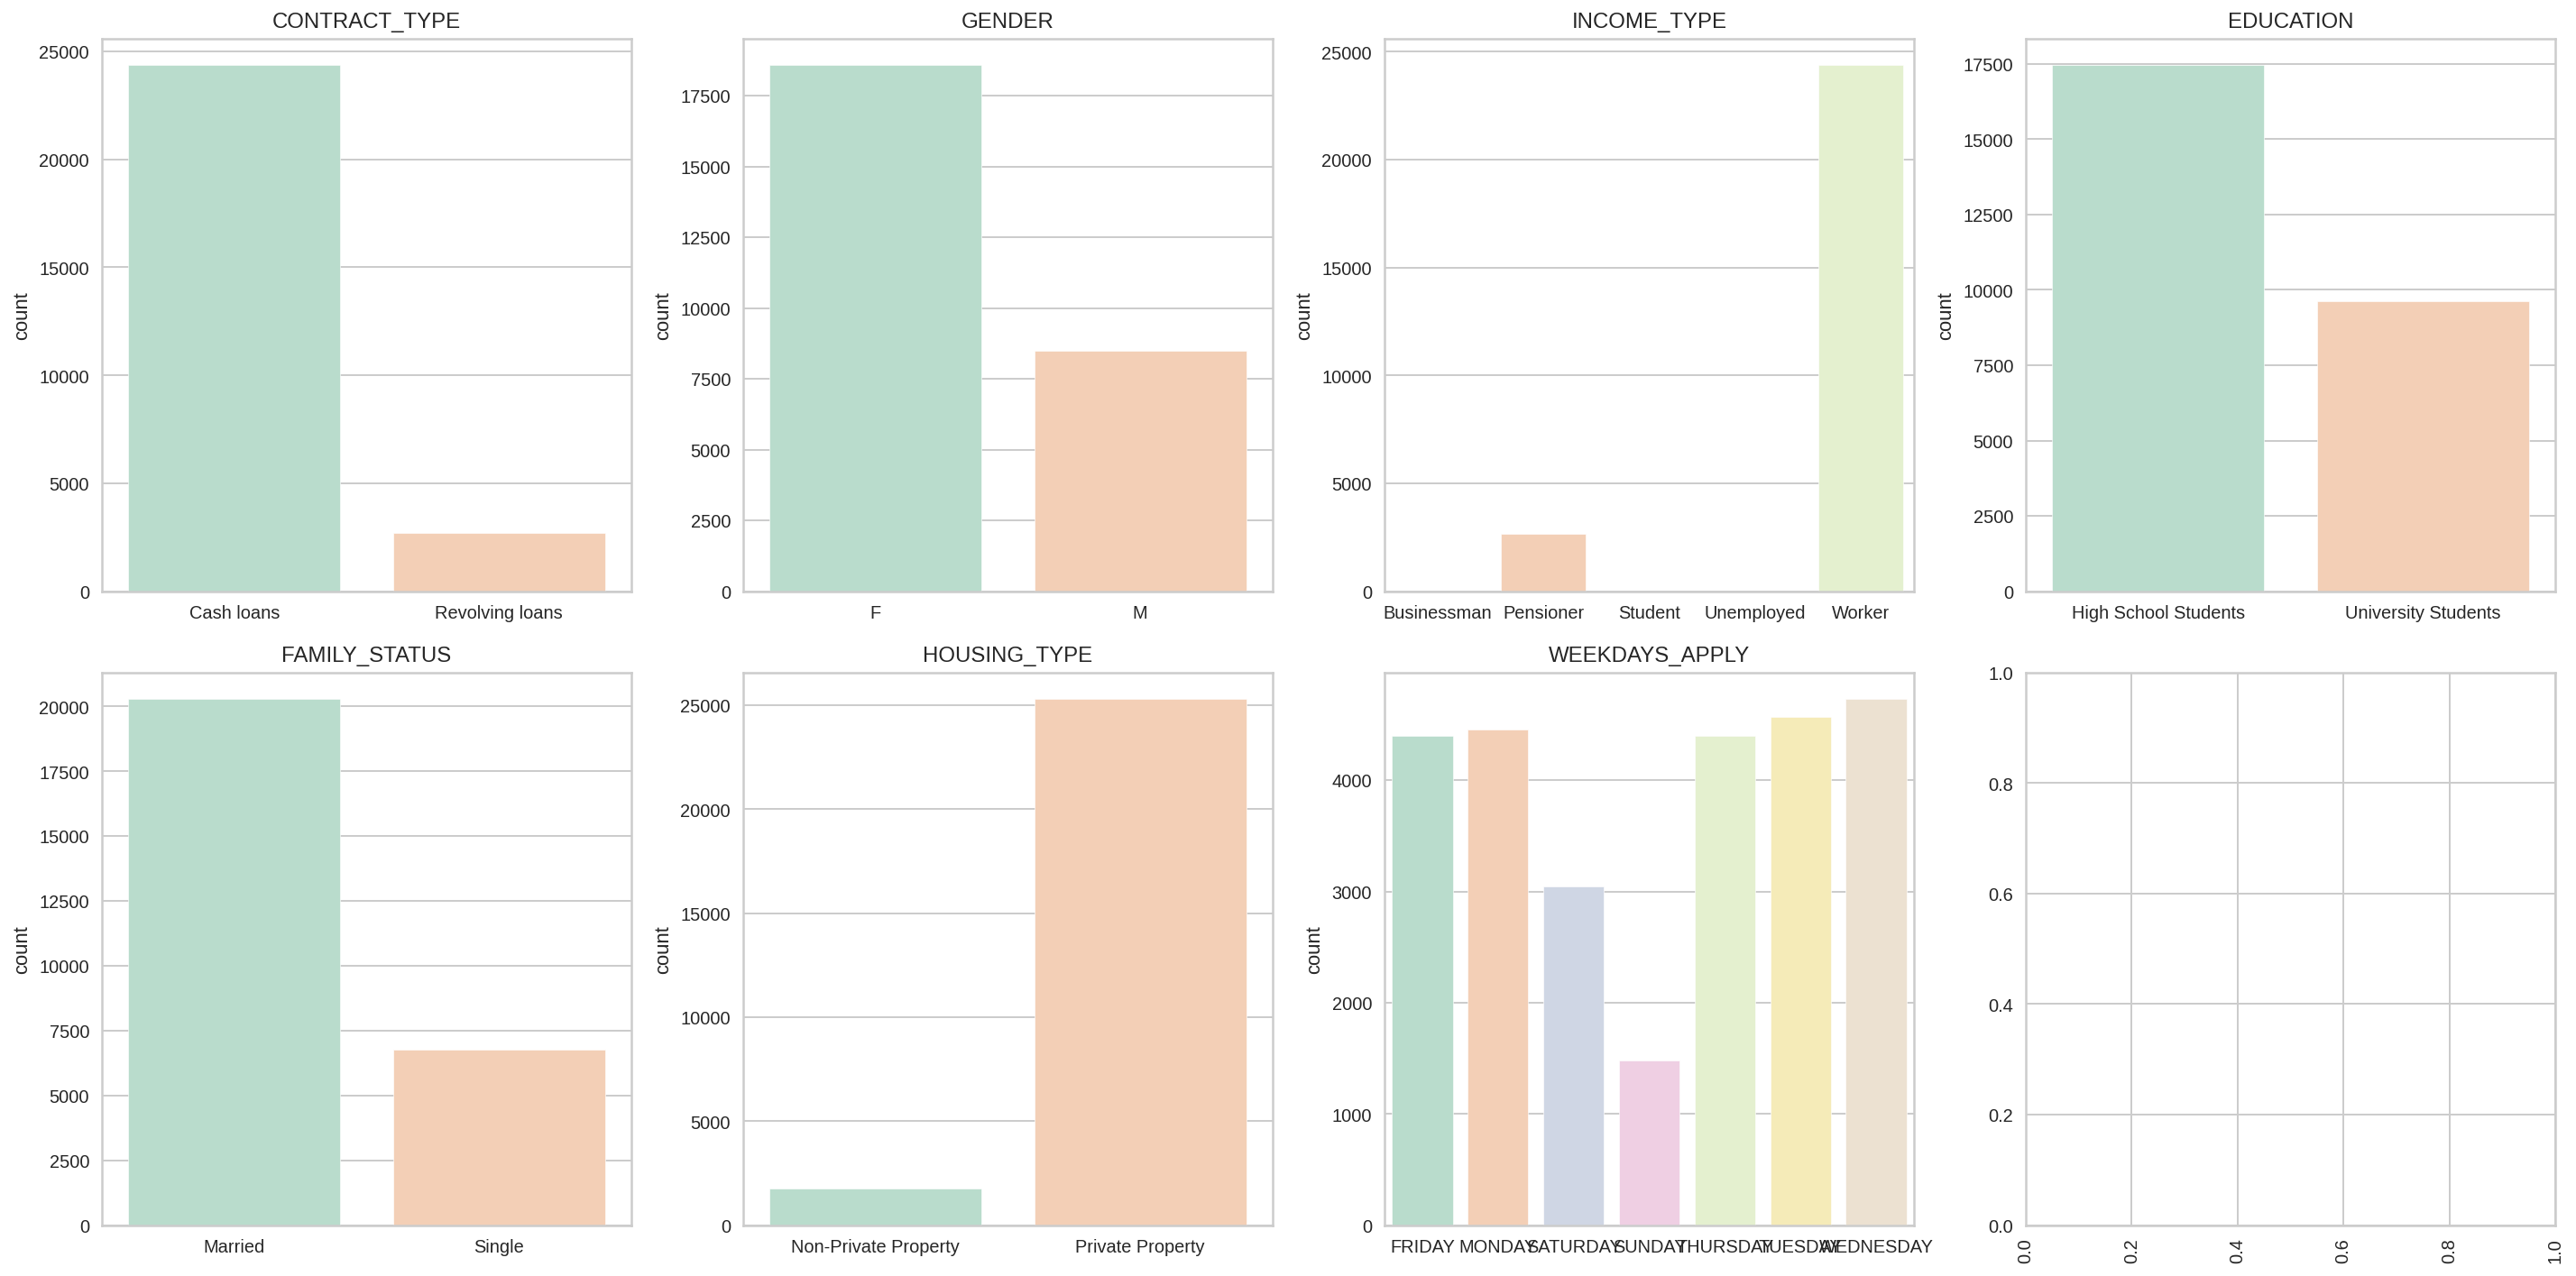

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
titles = list(data.select_dtypes(include=['category']))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=data, palette='Pastel2', ax=ax)
    ax.set_title(title)
    plt.xticks(rotation=90)
    ax.set_xlabel('')

plt.tight_layout()

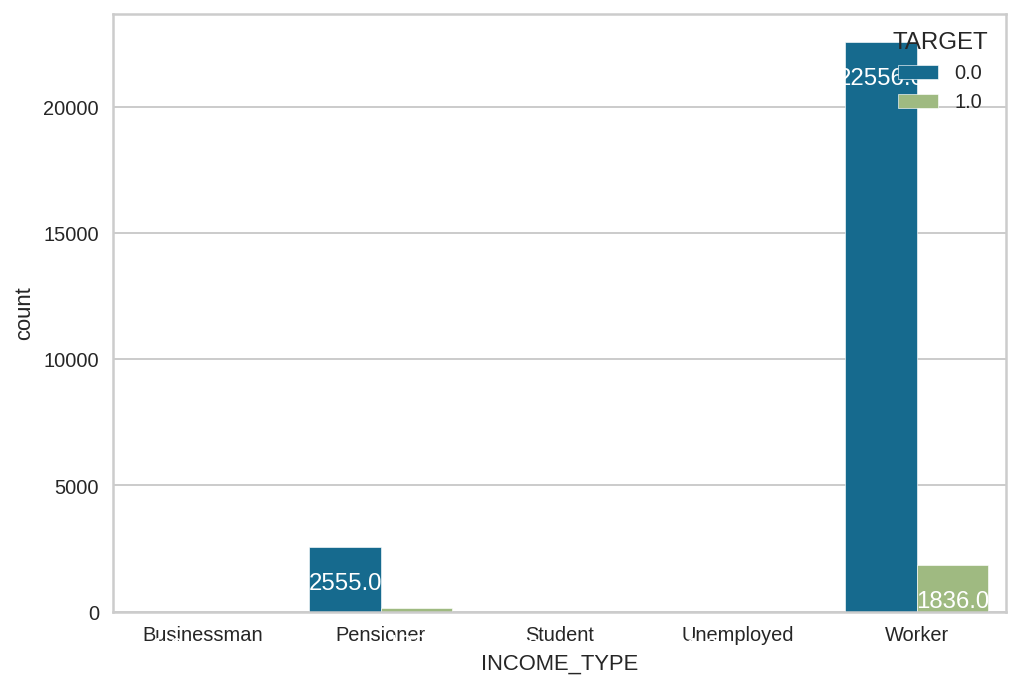

In [47]:
ax = sns.countplot(x='INCOME_TYPE', hue='TARGET', data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

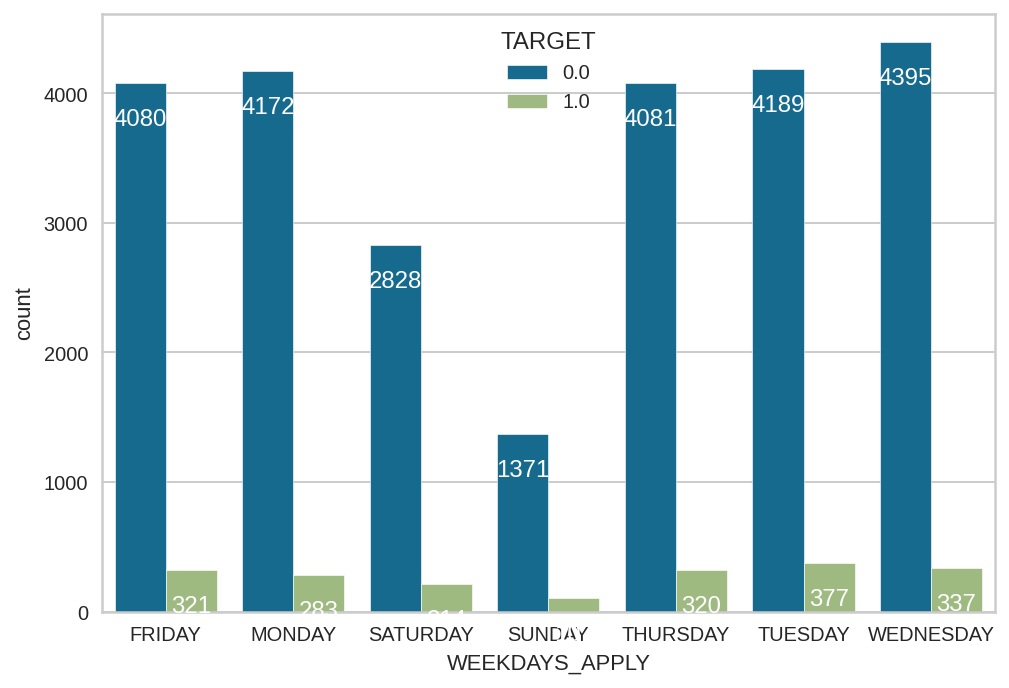

In [48]:
ax = sns.countplot(x='WEEKDAYS_APPLY', hue='TARGET', data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

## Frequency Distribution: Continuous Variables

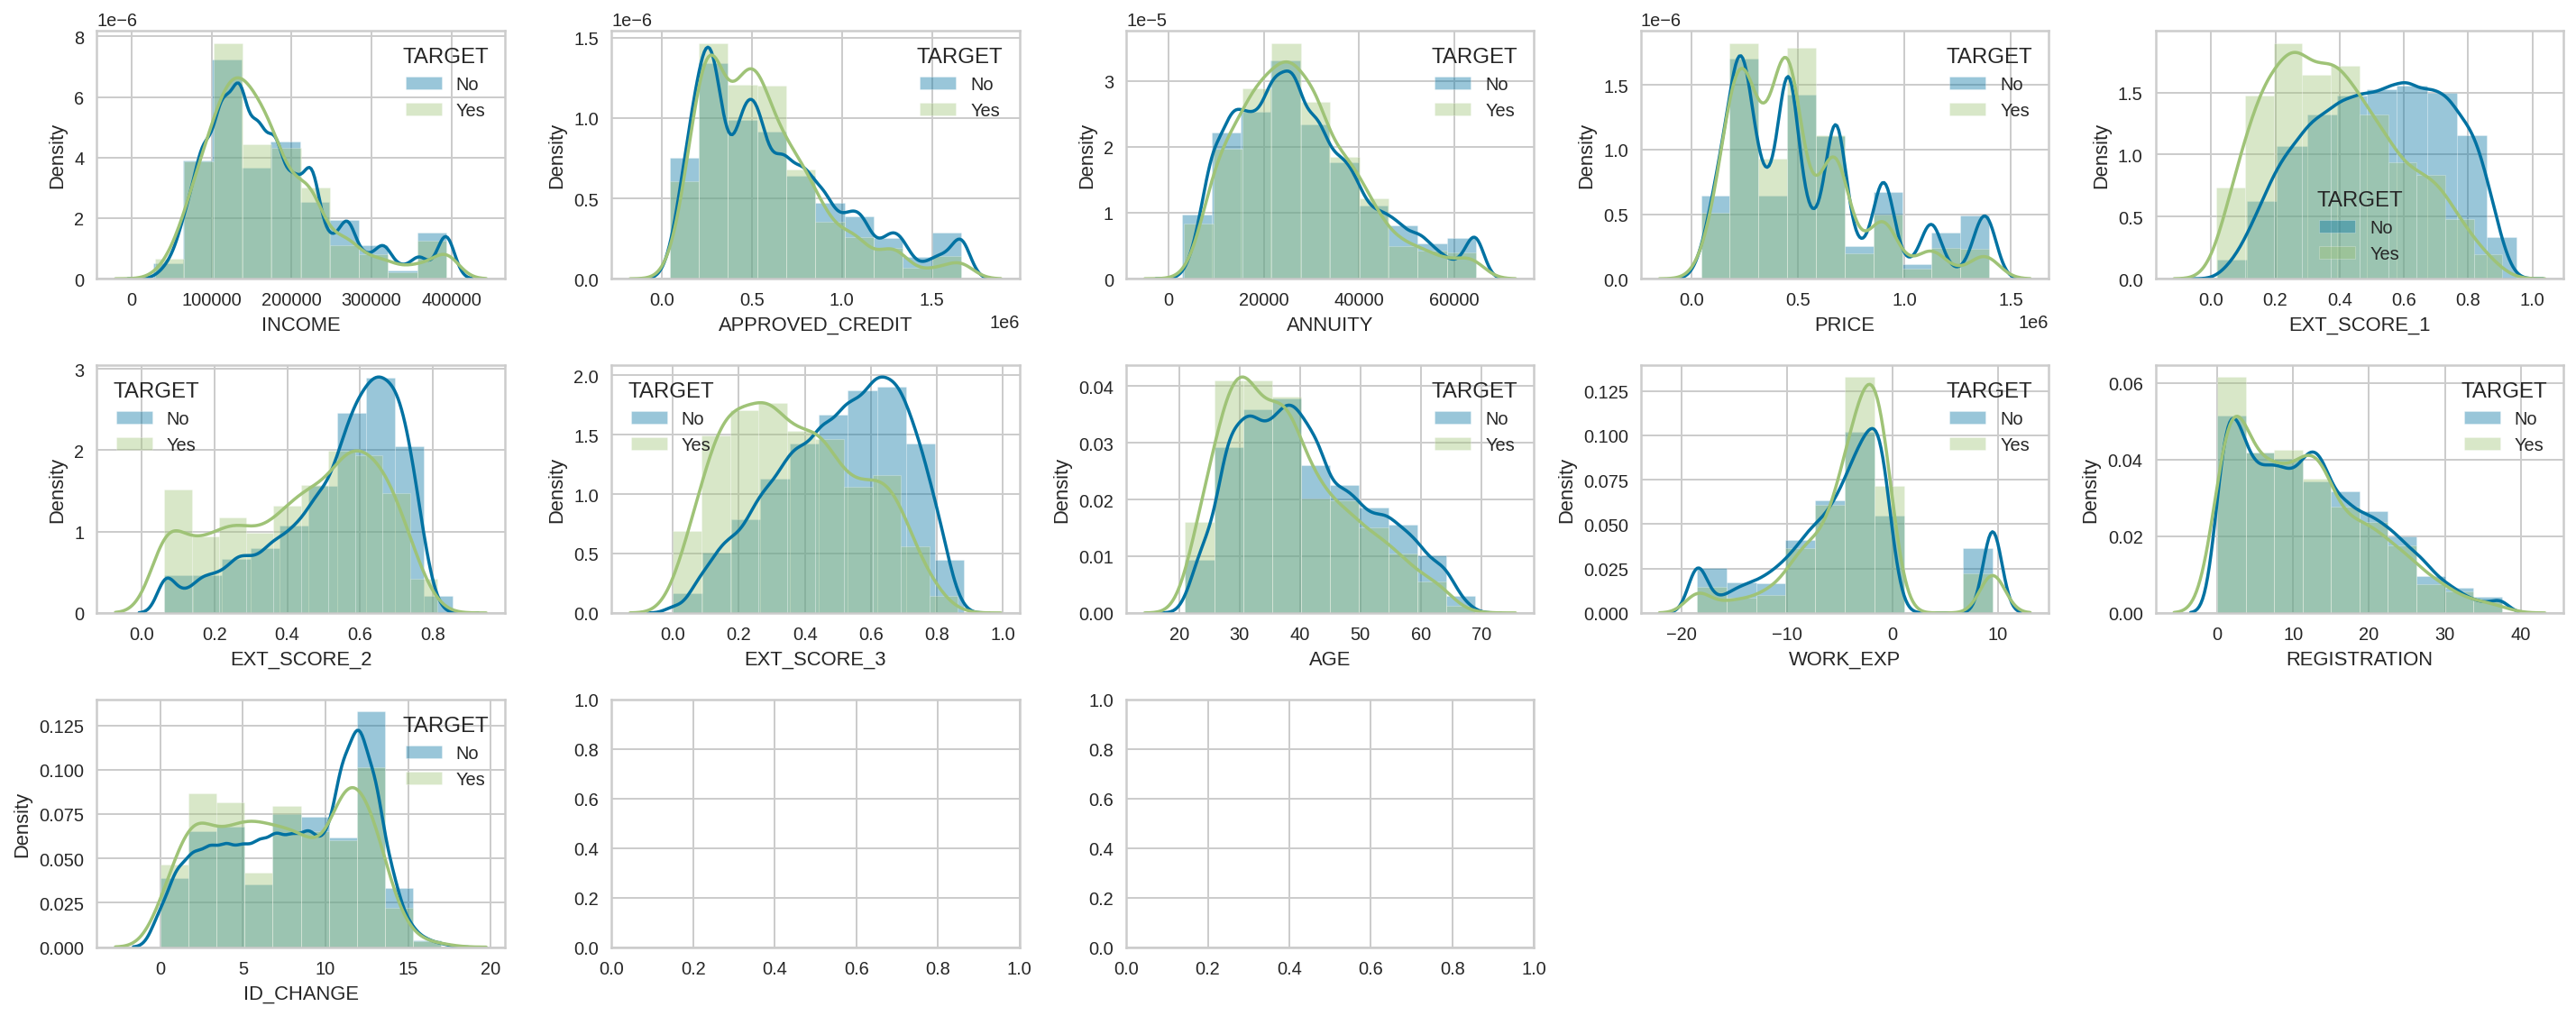

In [49]:
data_grouped = data.groupby(by='TARGET')
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))
titles = list(data.select_dtypes(include=['float']))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.distplot(data_grouped.get_group(0)[title], bins=10, ax=ax, label='No')
    sns.distplot(data_grouped.get_group(1)[title], bins=10, ax=ax, label='Yes')
    ax.legend(title='TARGET')

axs.flat[-1].remove()
axs.flat[-2].remove()
fig.tight_layout()

## Box Plots : Outlier Detection

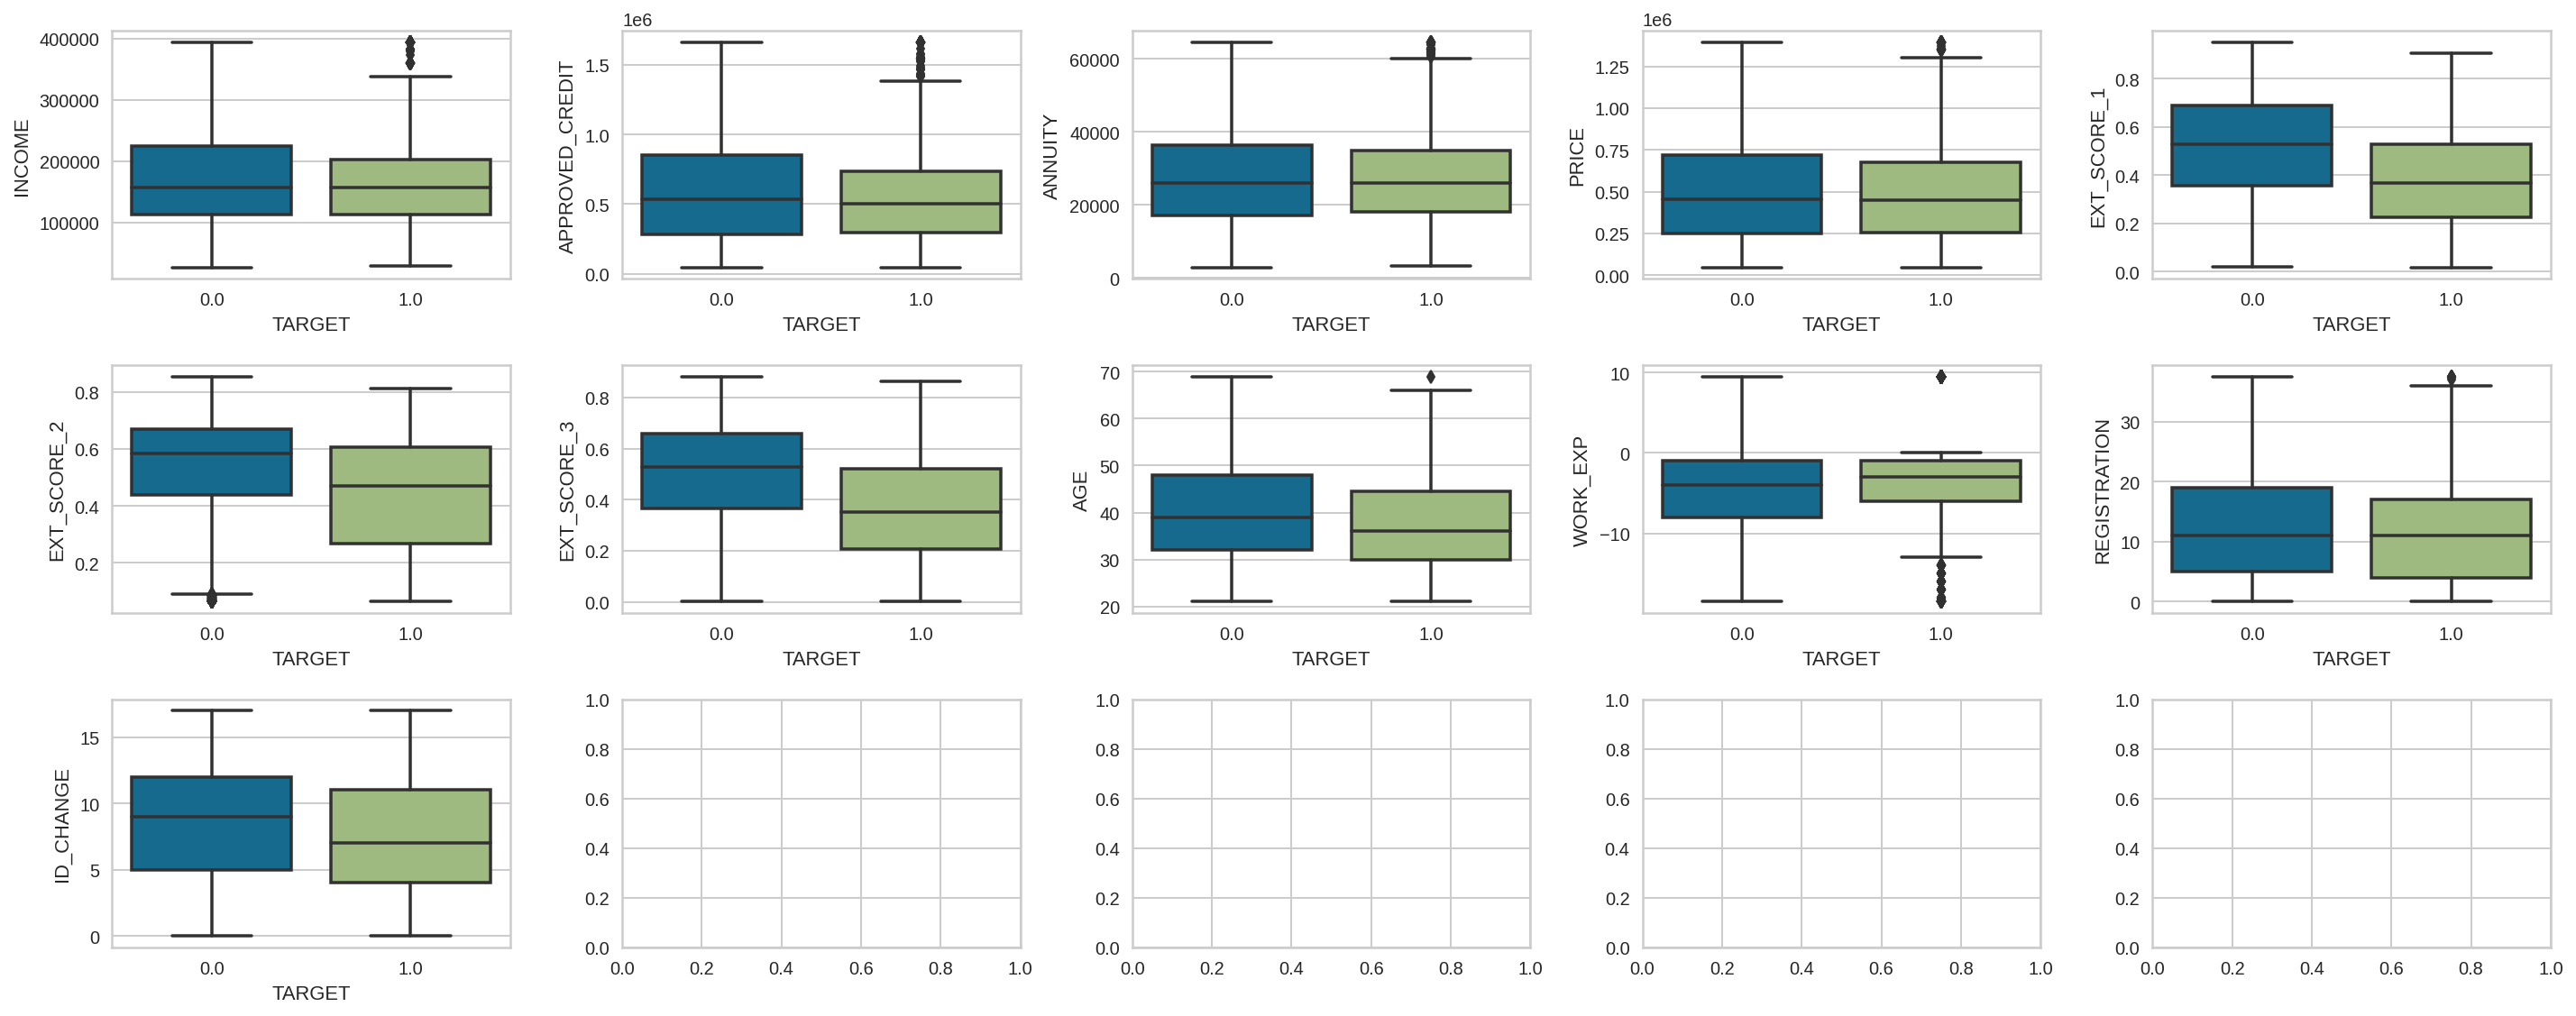

In [50]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))
titles = data.select_dtypes(include=['float'])

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.boxplot(x='TARGET', y=title, data=data, ax=ax)
fig.tight_layout()

In [51]:
# Removing Outliers on train data
titles = data.select_dtypes(include=['float'])
for col in titles:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  Lwishker = Q1 - 1.5 * IQR
  Uwishker = Q3 + 1.5 * IQR
  data[col] = data[col].clip(Lwishker, Uwishker)

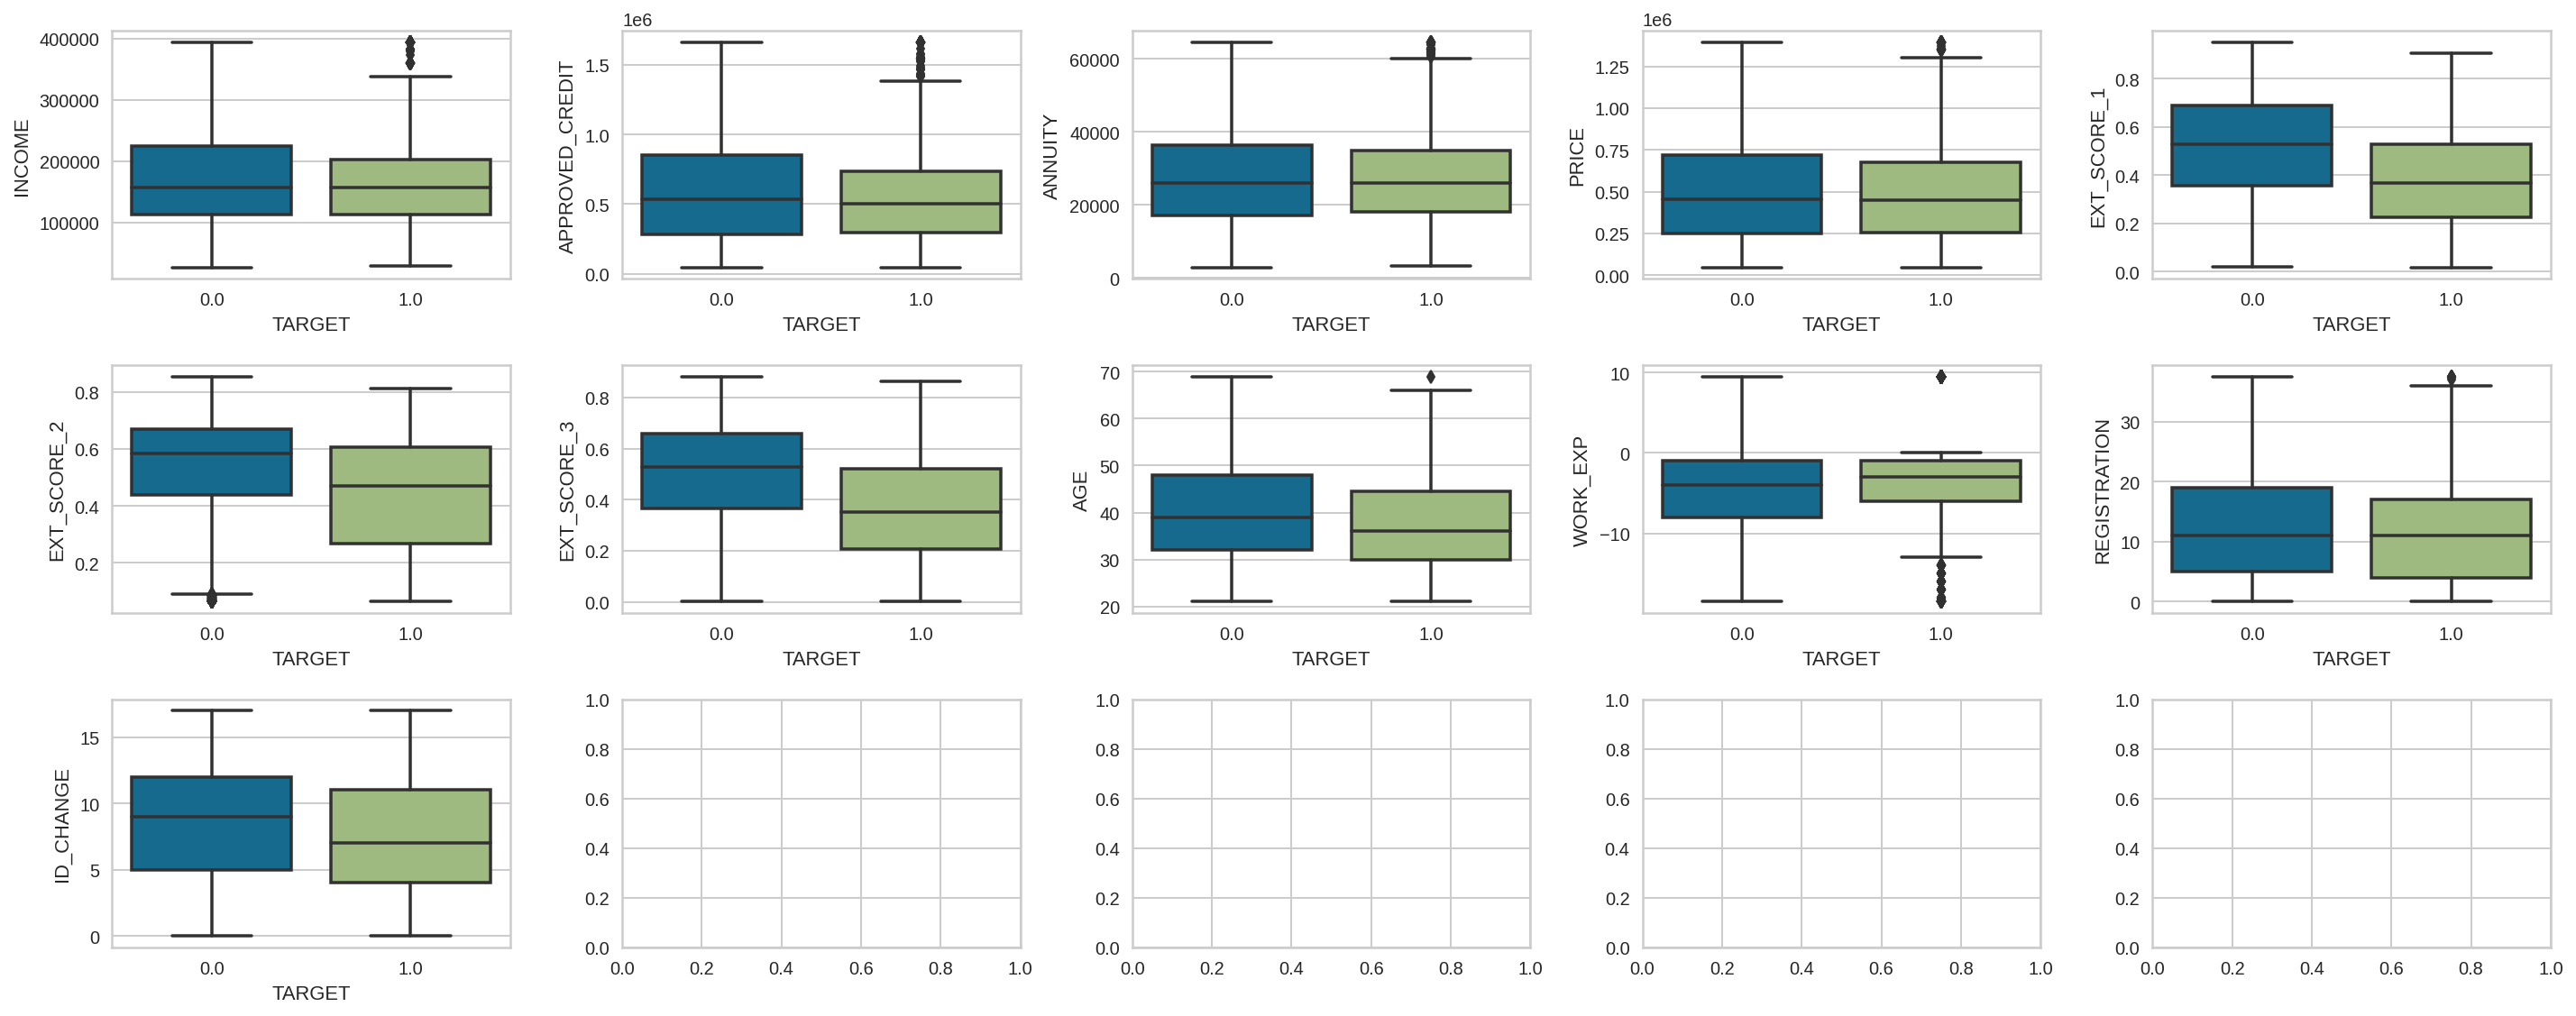

In [52]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))
titles = list(data.select_dtypes(include=['float']))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.boxplot(x='TARGET', y=title, data=data, ax=ax)
fig.tight_layout()

# Data Pre-Processing

## Data Encoding

In [53]:
# Change Definition of Education
data['CONTRACT_TYPE'] = data['CONTRACT_TYPE'].replace({'Cash loans':1, 'Revolving loans':0})

In [54]:
# Change Definition of Education
data['GENDER'] = data['GENDER'].replace({'F':0, 'M':1})

In [55]:
# Change Definition of Housing Type
data['HOUSING_TYPE'] = data['HOUSING_TYPE'].replace({'Private Property':1, 'Non-Private Property':0})

In [56]:
# Change Definition of Family Status
data['FAMILY_STATUS'] = data['FAMILY_STATUS'].replace({'Single':0, 'Married':1})

In [57]:
# Change Definition of Family Status
data['EDUCATION'] = data['EDUCATION'].replace({'High School Students':0, 'University Students':1})

In [58]:
# Change Definition of Housing Type
data['WEEKDAYS_APPLY'] = data['WEEKDAYS_APPLY'].replace({'SUNDAY':0, 'WEDNESDAY':3, 'TUESDAY':2, 'MONDAY':1, 'SATURDAY':6, 'THURSDAY':4, 'FRIDAY':5})

In [59]:
# Change Definition of Housing Type
data['INCOME_TYPE'] = data['INCOME_TYPE'].replace({'Worker':2, 'Pensioner':4, 'Student':1, 'Businessman':3, 'Unemployed':0})

## Resampling

In [60]:
# Assign 'TARGET' column to y 
y = data['TARGET'].values
# Assign all columns except 'TARGET' to X
X = data.drop(['TARGET'], axis = 1).values

In [61]:
# Check dimension
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (27075, 20)
y shape : (27075,)


In [62]:
# split data to train and test data
# with test size is 20% of overall data
# use stratified sampling
# and set RNG to 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 1000
)

In [63]:
# Make a new dataframe using train & test data
train_data_x = pd.DataFrame(X_train, columns=data.drop(['TARGET'], axis = 1).columns)
train_data_y = pd.DataFrame(y_train, columns=["TARGET"])
train_data = pd.concat([train_data_x, train_data_y], axis=1)

test_data_x = pd.DataFrame(X_test, columns=data.drop(['TARGET'], axis = 1).columns)
test_data_y = pd.DataFrame(y_test, columns=["TARGET"])
test_data = pd.concat([test_data_x, test_data_y], axis=1)

In [64]:
train_data

CONTRACT_TYPE  GENDER  NUM_CHILDREN    INCOME  APPROVED_CREDIT  \
0                1.0     0.0           1.0   90000.0         247275.0   
1                1.0     1.0           2.0  135000.0        1078200.0   
2                0.0     0.0           0.0  180000.0         270000.0   
3                1.0     0.0           0.0  112500.0         810000.0   
4                1.0     1.0           0.0  393750.0         688090.5   
...              ...     ...           ...       ...              ...   
21655            1.0     0.0           0.0  126000.0         526491.0   
21656            1.0     0.0           3.0   99000.0         182448.0   
21657            1.0     0.0           0.0  225000.0        1528200.0   
21658            1.0     1.0           0.0  157500.0        1035000.0   
21659            0.0     1.0           0.0  225000.0         180000.0   

       ANNUITY      PRICE  INCOME_TYPE  EDUCATION  FAMILY_STATUS  \
0      17338.5   225000.0          2.0        1.0            1.0   
1      31522.5   900000.0          2.0        0.0            0.0   
2      13500.0   270000.0          2.0        1.0            1.0   
3      23683.5   810000.0          2.0        0.0            0.0   
4      35131.5   594000.0          2.0        1.0            0.0   
...        ...        ...          ...        ...            ...   
21655  19039.5   454500.0          2.0        0.0            1.0   
21656  21780.0   157500.0          2.0        0.0            1.0   
21657  53248.5  1350000.0          2.0        1.0            1.0   
21658  33516.0  1035000.0          2.0        0.0            1.0   
21659   9000.0   180000.0          2.0        1.0            0.0   

       HOUSING_TYPE  WEEKDAYS_APPLY  HOUR_APPLY  EXT_SCORE_1  EXT_SCORE_2  \
0               1.0             5.0        11.0     0.462701     0.429252   
1               1.0             0.0        12.0     0.135766     0.716985   
2               0.0             2.0        13.0     0.607169     0.641274   
3               1.0             5.0         8.0     0.612526     0.492852   
4               0.0             5.0        19.0     0.399171     0.497810   
...             ...             ...         ...          ...          ...   
21655           1.0             3.0        13.0     0.440711     0.587651   
21656           1.0             2.0        15.0     0.712838     0.773921   
21657           1.0             2.0        10.0     0.658699     0.713837   
21658           1.0             2.0        17.0     0.512296     0.062657   
21659           0.0             2.0        16.0     0.619438     0.588689   

       EXT_SCORE_3   AGE  WORK_EXP  REGISTRATION  ID_CHANGE  TARGET  
0         0.588488  43.0      -7.0          21.0       13.0     0.0  
1         0.767523  35.0     -10.0          19.0       13.0     0.0  
2         0.683269  28.0      -3.0          13.0        6.0     0.0  
3         0.175606  55.0      -2.0          36.0        8.0     0.0  
4         0.593718  25.0      -2.0          10.0        5.0     0.0  
...            ...   ...       ...           ...        ...     ...  
21655     0.484851  33.0      -9.0          14.0        7.0     0.0  
21656     0.621226  39.0      -3.0           1.0       14.0     0.0  
21657     0.248536  37.0      -3.0           7.0       14.0     0.0  
21658     0.609276  50.0     -14.0          15.0        5.0     0.0  
21659     0.474051  24.0      -1.0           1.0        3.0     0.0  

[21660 rows x 21 columns]

In [65]:
test_data

CONTRACT_TYPE  GENDER  NUM_CHILDREN    INCOME  APPROVED_CREDIT  ANNUITY  \
0               1.0     1.0           1.0  180000.0         502186.5  56925.0   
1               1.0     0.0           2.0  157500.0        1288350.0  37800.0   
2               1.0     0.0           1.0  157500.0         816660.0  26473.5   
3               1.0     1.0           2.0  135000.0        1130760.0  36607.5   
4               1.0     1.0           0.0  360000.0         711747.0  56362.5   
...             ...     ...           ...       ...              ...      ...   
5410            1.0     0.0           0.0  126000.0         906228.0  40045.5   
5411            1.0     0.0           0.0  135000.0         521280.0  44595.0   
5412            1.0     0.0           0.0  162000.0         314100.0  17167.5   
5413            1.0     0.0           2.0  112500.0         755190.0  28116.0   
5414            1.0     0.0           1.0  157500.0         263686.5  27976.5   

          PRICE  INCOME_TYPE  EDUCATION  FAMILY_STATUS  HOUSING_TYPE  \
0      477000.0          2.0        0.0            1.0           1.0   
1     1125000.0          2.0        0.0            1.0           1.0   
2      585000.0          2.0        0.0            0.0           1.0   
3      810000.0          2.0        0.0            1.0           1.0   
4      607500.0          2.0        0.0            1.0           1.0   
...         ...          ...        ...            ...           ...   
5410   810000.0          4.0        0.0            0.0           1.0   
5411   450000.0          2.0        0.0            1.0           1.0   
5412   225000.0          2.0        0.0            1.0           1.0   
5413   675000.0          2.0        1.0            1.0           1.0   
5414   238500.0          2.0        1.0            1.0           1.0   

      WEEKDAYS_APPLY  HOUR_APPLY  EXT_SCORE_1  EXT_SCORE_2  EXT_SCORE_3   AGE  \
0                6.0        12.0     0.382818     0.563537     0.591977  37.0   
1                1.0         9.0     0.256252     0.122947     0.600658  31.0   
2                3.0        12.0     0.700868     0.510612     0.771362  53.0   
3                2.0        12.0     0.264553     0.579366     0.135106  33.0   
4                1.0        10.0     0.506508     0.407175     0.683269  30.0   
...              ...         ...          ...          ...          ...   ...   
5410             3.0        13.0     0.512541     0.613365     0.816092  54.0   
5411             3.0        10.0     0.454155     0.460596     0.600658  43.0   
5412             3.0         8.0     0.483212     0.062657     0.465069  66.0   
5413             1.0        16.0     0.479807     0.768788     0.403142  40.0   
5414             1.0        10.0     0.316791     0.714926     0.865896  30.0   

      WORK_EXP  REGISTRATION  ID_CHANGE  TARGET  
0         -0.0           3.0       14.0     0.0  
1        -13.0           3.0        9.0     0.0  
2         -8.0          18.0        7.0     0.0  
3        -10.0          16.0        8.0     0.0  
4        -12.0          15.0        9.0     0.0  
...        ...           ...        ...     ...  
5410       9.5          18.0        9.0     0.0  
5411     -10.0           0.0       10.0     0.0  
5412      -3.0           4.0       12.0     0.0  
5413      -7.0           3.0       14.0     0.0  
5414      -2.0          12.0       10.0     0.0  

[5415 rows x 21 columns]

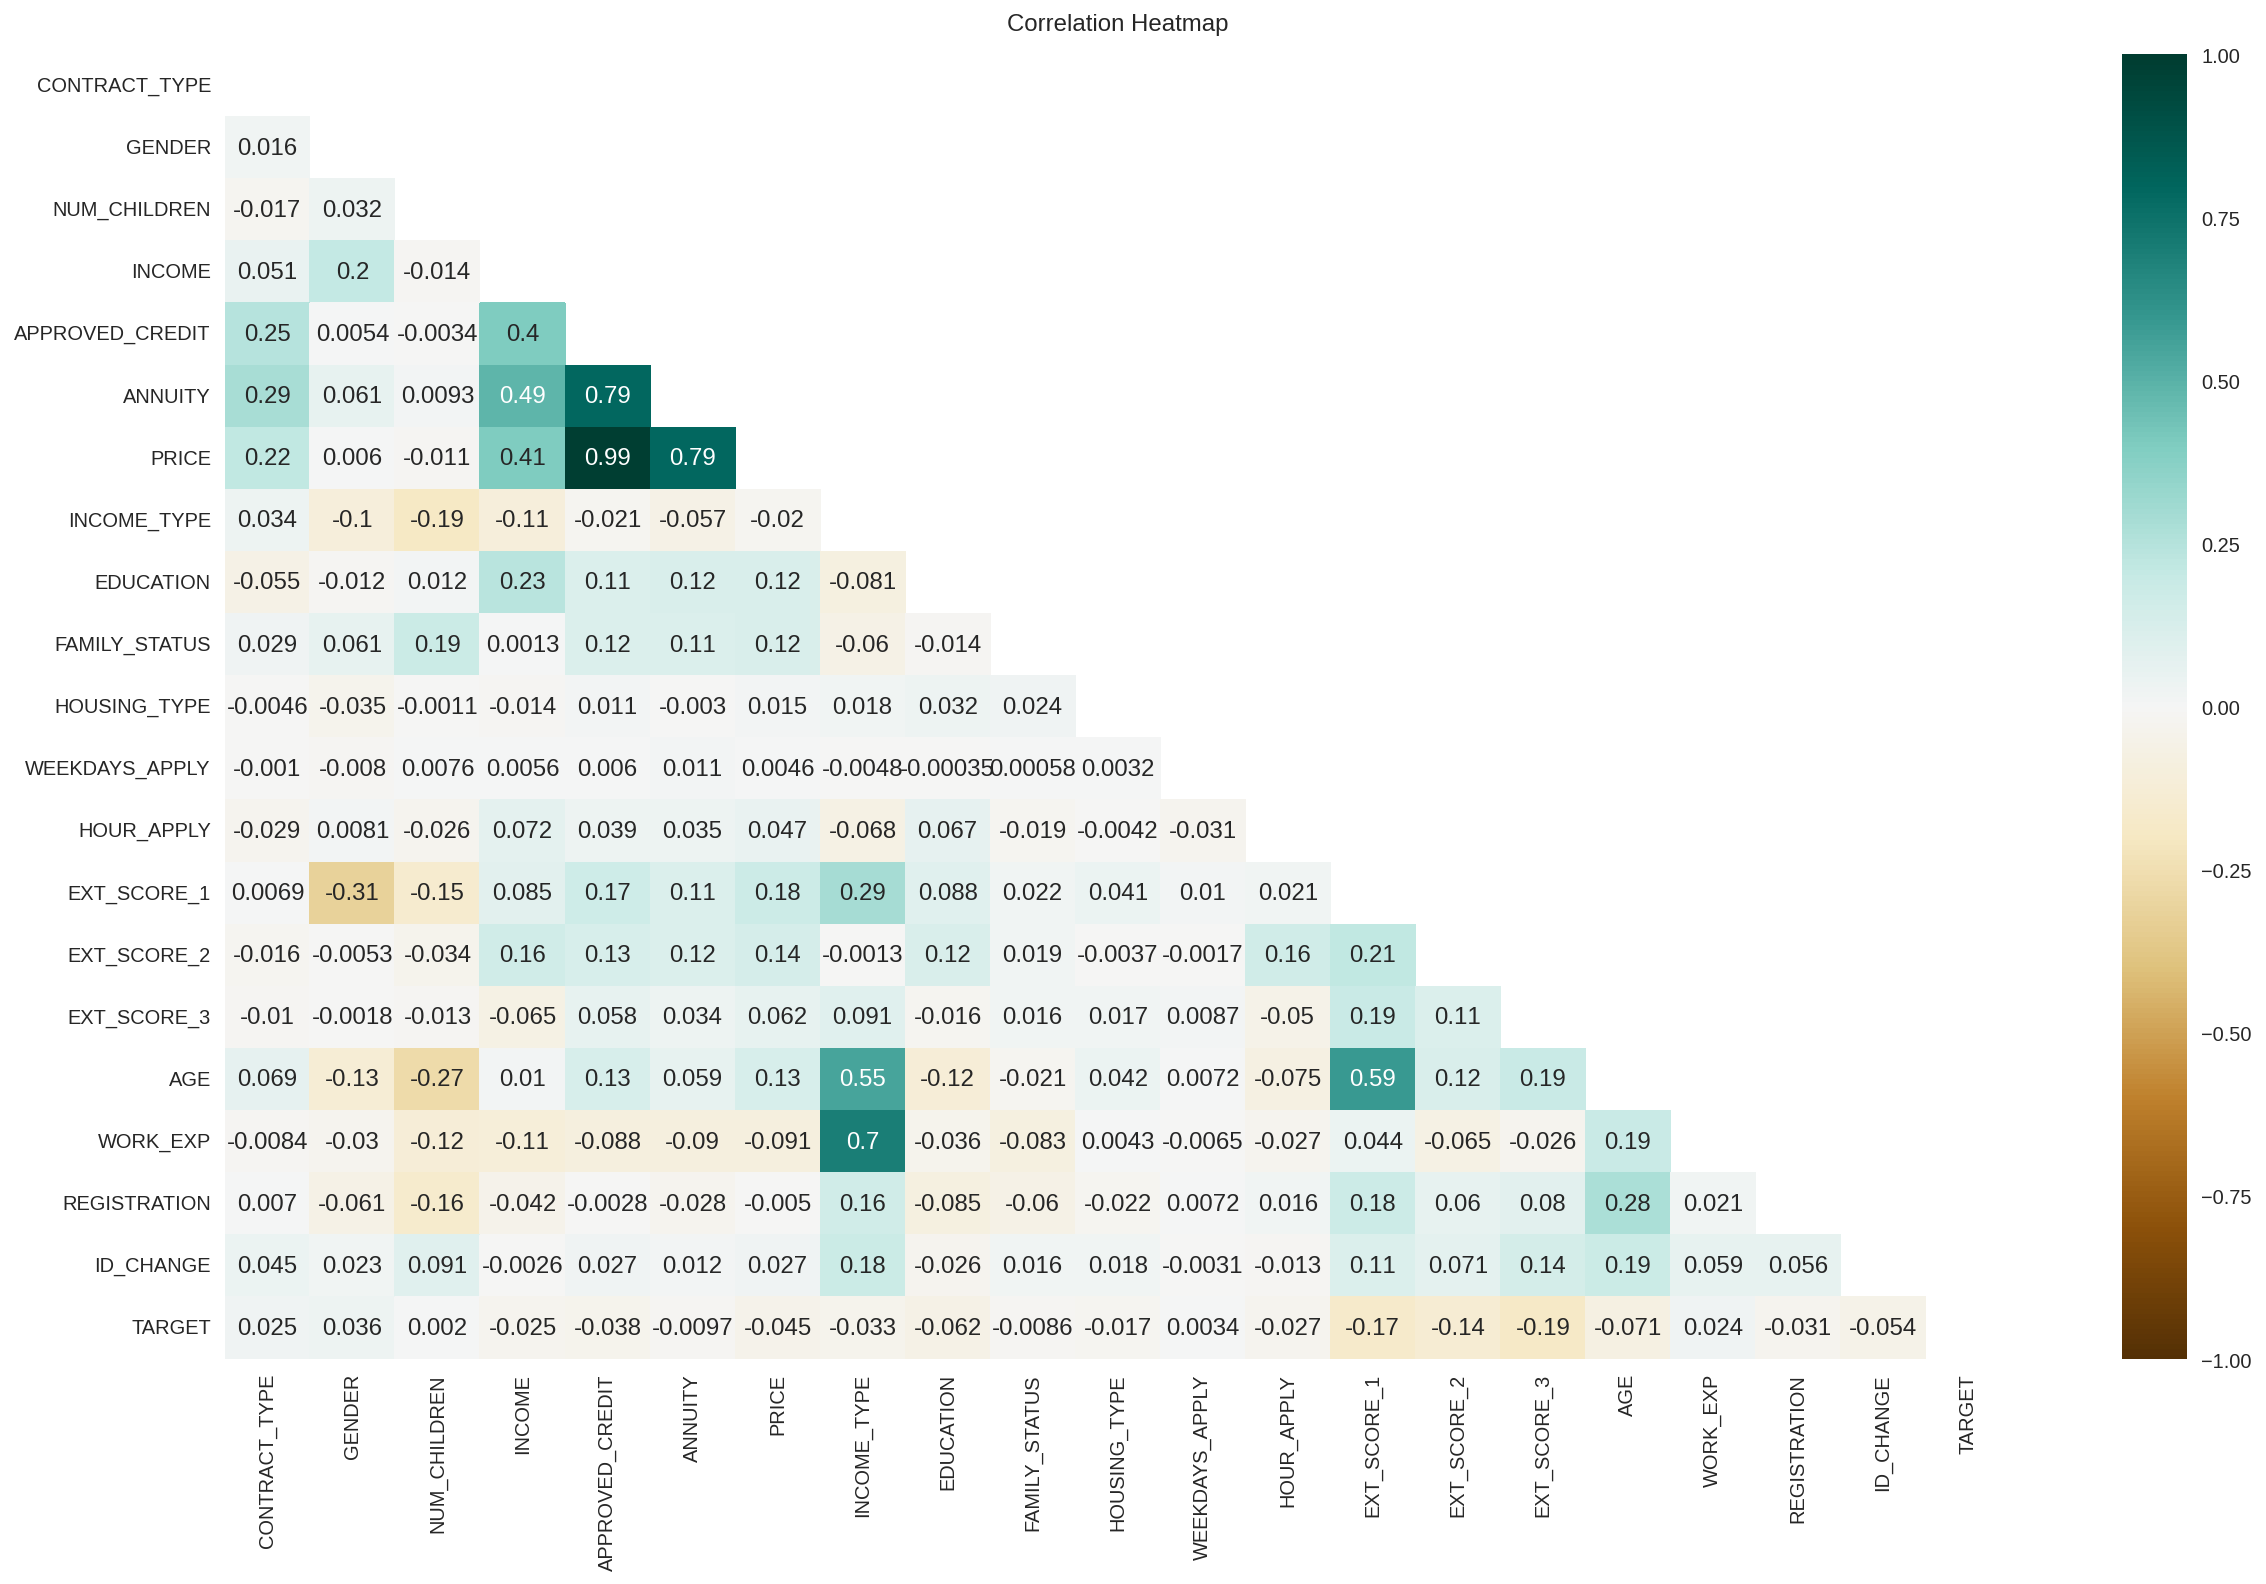

In [66]:
# Increase the size of the heatmap
plt.figure(figsize=(20, 12))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(train_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(train_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Normalization

In [67]:
# Check train data
train_data

CONTRACT_TYPE  GENDER  NUM_CHILDREN    INCOME  APPROVED_CREDIT  \
0                1.0     0.0           1.0   90000.0         247275.0   
1                1.0     1.0           2.0  135000.0        1078200.0   
2                0.0     0.0           0.0  180000.0         270000.0   
3                1.0     0.0           0.0  112500.0         810000.0   
4                1.0     1.0           0.0  393750.0         688090.5   
...              ...     ...           ...       ...              ...   
21655            1.0     0.0           0.0  126000.0         526491.0   
21656            1.0     0.0           3.0   99000.0         182448.0   
21657            1.0     0.0           0.0  225000.0        1528200.0   
21658            1.0     1.0           0.0  157500.0        1035000.0   
21659            0.0     1.0           0.0  225000.0         180000.0   

       ANNUITY      PRICE  INCOME_TYPE  EDUCATION  FAMILY_STATUS  \
0      17338.5   225000.0          2.0        1.0            1.0   
1      31522.5   900000.0          2.0        0.0            0.0   
2      13500.0   270000.0          2.0        1.0            1.0   
3      23683.5   810000.0          2.0        0.0            0.0   
4      35131.5   594000.0          2.0        1.0            0.0   
...        ...        ...          ...        ...            ...   
21655  19039.5   454500.0          2.0        0.0            1.0   
21656  21780.0   157500.0          2.0        0.0            1.0   
21657  53248.5  1350000.0          2.0        1.0            1.0   
21658  33516.0  1035000.0          2.0        0.0            1.0   
21659   9000.0   180000.0          2.0        1.0            0.0   

       HOUSING_TYPE  WEEKDAYS_APPLY  HOUR_APPLY  EXT_SCORE_1  EXT_SCORE_2  \
0               1.0             5.0        11.0     0.462701     0.429252   
1               1.0             0.0        12.0     0.135766     0.716985   
2               0.0             2.0        13.0     0.607169     0.641274   
3               1.0             5.0         8.0     0.612526     0.492852   
4               0.0             5.0        19.0     0.399171     0.497810   
...             ...             ...         ...          ...          ...   
21655           1.0             3.0        13.0     0.440711     0.587651   
21656           1.0             2.0        15.0     0.712838     0.773921   
21657           1.0             2.0        10.0     0.658699     0.713837   
21658           1.0             2.0        17.0     0.512296     0.062657   
21659           0.0             2.0        16.0     0.619438     0.588689   

       EXT_SCORE_3   AGE  WORK_EXP  REGISTRATION  ID_CHANGE  TARGET  
0         0.588488  43.0      -7.0          21.0       13.0     0.0  
1         0.767523  35.0     -10.0          19.0       13.0     0.0  
2         0.683269  28.0      -3.0          13.0        6.0     0.0  
3         0.175606  55.0      -2.0          36.0        8.0     0.0  
4         0.593718  25.0      -2.0          10.0        5.0     0.0  
...            ...   ...       ...           ...        ...     ...  
21655     0.484851  33.0      -9.0          14.0        7.0     0.0  
21656     0.621226  39.0      -3.0           1.0       14.0     0.0  
21657     0.248536  37.0      -3.0           7.0       14.0     0.0  
21658     0.609276  50.0     -14.0          15.0        5.0     0.0  
21659     0.474051  24.0      -1.0           1.0        3.0     0.0  

[21660 rows x 21 columns]

In [68]:
# Check descriptive stats for train data
train_data.describe()

CONTRACT_TYPE        GENDER  NUM_CHILDREN         INCOME  \
count   21660.000000  21660.000000  21660.000000   21660.000000   
mean        0.901431      0.313573      0.505863  174998.481440   
std         0.298089      0.463956      0.755431   80502.835518   
min         0.000000      0.000000      0.000000   27000.000000   
25%         1.000000      0.000000      0.000000  112500.000000   
50%         1.000000      0.000000      0.000000  157500.000000   
75%         1.000000      1.000000      1.000000  225000.000000   
max         1.000000      1.000000      8.000000  393750.000000   

       APPROVED_CREDIT       ANNUITY         PRICE   INCOME_TYPE  \
count     2.166000e+04  21660.000000  2.166000e+04  21660.000000   
mean      6.171793e+05  27994.670256  5.512384e+05      2.198569   
std       3.944568e+05  13837.858633  3.498807e+05      0.598757   
min       4.500000e+04   2857.500000  4.500000e+04      0.000000   
25%       2.844000e+05  17356.500000  2.475000e+05      2.000000   
50%       5.264910e+05  26046.000000  4.545000e+05      2.000000   
75%       8.356050e+05  36202.500000  7.065000e+05      2.000000   
max       1.662412e+06  64558.125000  1.395000e+06      4.000000   

          EDUCATION  FAMILY_STATUS  HOUSING_TYPE  WEEKDAYS_APPLY  \
count  21660.000000   21660.000000  21660.000000    21660.000000   
mean       0.356094       0.750369      0.933795        3.166390   
std        0.478855       0.432809      0.248646        1.769724   
min        0.000000       0.000000      0.000000        0.000000   
25%        0.000000       1.000000      1.000000        2.000000   
50%        0.000000       1.000000      1.000000        3.000000   
75%        1.000000       1.000000      1.000000        5.000000   
max        1.000000       1.000000      1.000000        6.000000   

         HOUR_APPLY   EXT_SCORE_1   EXT_SCORE_2   EXT_SCORE_3           AGE  \
count  21660.000000  21660.000000  21660.000000  21660.000000  21660.000000   
mean      12.198338      0.510288      0.530351      0.497745     40.682548   
std        3.272755      0.209248      0.180254      0.194372     10.671674   
min        0.000000      0.017095      0.062657      0.000527     21.000000   
25%       10.000000      0.344327      0.427849      0.353988     32.000000   
50%       12.000000      0.516657      0.578062      0.519097     39.000000   
75%       15.000000      0.681580      0.667863      0.654529     48.000000   
max       23.000000      0.951624      0.855000      0.882530     69.000000   

           WORK_EXP  REGISTRATION     ID_CHANGE        TARGET  
count  21660.000000  21660.000000  21660.000000  21660.000000  
mean      -4.510642     12.348176      8.149815      0.072345  
std        6.662758      8.800383      4.140994      0.259065  
min      -18.500000      0.000000      0.000000      0.000000  
25%       -8.000000      5.000000      5.000000      0.000000  
50%       -4.000000     11.000000      9.000000      0.000000  
75%       -1.000000     18.000000     12.000000      0.000000  
max        9.500000     37.500000     17.000000      1.000000

In [69]:
# Check test data
test_data

CONTRACT_TYPE  GENDER  NUM_CHILDREN    INCOME  APPROVED_CREDIT  ANNUITY  \
0               1.0     1.0           1.0  180000.0         502186.5  56925.0   
1               1.0     0.0           2.0  157500.0        1288350.0  37800.0   
2               1.0     0.0           1.0  157500.0         816660.0  26473.5   
3               1.0     1.0           2.0  135000.0        1130760.0  36607.5   
4               1.0     1.0           0.0  360000.0         711747.0  56362.5   
...             ...     ...           ...       ...              ...      ...   
5410            1.0     0.0           0.0  126000.0         906228.0  40045.5   
5411            1.0     0.0           0.0  135000.0         521280.0  44595.0   
5412            1.0     0.0           0.0  162000.0         314100.0  17167.5   
5413            1.0     0.0           2.0  112500.0         755190.0  28116.0   
5414            1.0     0.0           1.0  157500.0         263686.5  27976.5   

          PRICE  INCOME_TYPE  EDUCATION  FAMILY_STATUS  HOUSING_TYPE  \
0      477000.0          2.0        0.0            1.0           1.0   
1     1125000.0          2.0        0.0            1.0           1.0   
2      585000.0          2.0        0.0            0.0           1.0   
3      810000.0          2.0        0.0            1.0           1.0   
4      607500.0          2.0        0.0            1.0           1.0   
...         ...          ...        ...            ...           ...   
5410   810000.0          4.0        0.0            0.0           1.0   
5411   450000.0          2.0        0.0            1.0           1.0   
5412   225000.0          2.0        0.0            1.0           1.0   
5413   675000.0          2.0        1.0            1.0           1.0   
5414   238500.0          2.0        1.0            1.0           1.0   

      WEEKDAYS_APPLY  HOUR_APPLY  EXT_SCORE_1  EXT_SCORE_2  EXT_SCORE_3   AGE  \
0                6.0        12.0     0.382818     0.563537     0.591977  37.0   
1                1.0         9.0     0.256252     0.122947     0.600658  31.0   
2                3.0        12.0     0.700868     0.510612     0.771362  53.0   
3                2.0        12.0     0.264553     0.579366     0.135106  33.0   
4                1.0        10.0     0.506508     0.407175     0.683269  30.0   
...              ...         ...          ...          ...          ...   ...   
5410             3.0        13.0     0.512541     0.613365     0.816092  54.0   
5411             3.0        10.0     0.454155     0.460596     0.600658  43.0   
5412             3.0         8.0     0.483212     0.062657     0.465069  66.0   
5413             1.0        16.0     0.479807     0.768788     0.403142  40.0   
5414             1.0        10.0     0.316791     0.714926     0.865896  30.0   

      WORK_EXP  REGISTRATION  ID_CHANGE  TARGET  
0         -0.0           3.0       14.0     0.0  
1        -13.0           3.0        9.0     0.0  
2         -8.0          18.0        7.0     0.0  
3        -10.0          16.0        8.0     0.0  
4        -12.0          15.0        9.0     0.0  
...        ...           ...        ...     ...  
5410       9.5          18.0        9.0     0.0  
5411     -10.0           0.0       10.0     0.0  
5412      -3.0           4.0       12.0     0.0  
5413      -7.0           3.0       14.0     0.0  
5414      -2.0          12.0       10.0     0.0  

[5415 rows x 21 columns]

In [70]:
# Check descriptive stats for test data
test_data.describe()

CONTRACT_TYPE       GENDER  NUM_CHILDREN         INCOME  \
count    5415.000000  5415.000000   5415.000000    5415.000000   
mean        0.897507     0.312650      0.509326  174203.640166   
std         0.303324     0.463616      0.768237   80221.683776   
min         0.000000     0.000000      0.000000   29250.000000   
25%         1.000000     0.000000      0.000000  112500.000000   
50%         1.000000     0.000000      0.000000  157500.000000   
75%         1.000000     1.000000      1.000000  225000.000000   
max         1.000000     1.000000      7.000000  393750.000000   

       APPROVED_CREDIT       ANNUITY         PRICE  INCOME_TYPE    EDUCATION  \
count     5.415000e+03   5415.000000  5.415000e+03  5415.000000  5415.000000   
mean      6.193987e+05  28014.923684  5.524258e+05     2.194090     0.349954   
std       3.947288e+05  13905.935747  3.498250e+05     0.591937     0.476999   
min       4.500000e+04   3586.500000  4.500000e+04     2.000000     0.000000   
25%       2.844000e+05  17095.500000  2.565000e+05     2.000000     0.000000   
50%       5.374710e+05  26208.000000  4.545000e+05     2.000000     0.000000   
75%       8.409510e+05  36303.750000  7.065000e+05     2.000000     1.000000   
max       1.662412e+06  64558.125000  1.395000e+06     4.000000     1.000000   

       FAMILY_STATUS  HOUSING_TYPE  WEEKDAYS_APPLY   HOUR_APPLY  EXT_SCORE_1  \
count    5415.000000   5415.000000     5415.000000  5415.000000  5415.000000   
mean        0.746260      0.938319        3.150508    12.195753     0.512949   
std         0.435191      0.240597        1.746511     3.276747     0.210307   
min         0.000000      0.000000        0.000000     1.000000     0.025084   
25%         0.000000      1.000000        2.000000    10.000000     0.347652   
50%         1.000000      1.000000        3.000000    12.000000     0.520817   
75%         1.000000      1.000000        5.000000    15.000000     0.686047   
max         1.000000      1.000000        6.000000    23.000000     0.938285   

       EXT_SCORE_2  EXT_SCORE_3          AGE     WORK_EXP  REGISTRATION  \
count  5415.000000  5415.000000  5415.000000  5415.000000   5415.000000   
mean      0.528462     0.494238    40.673869    -4.447276     12.463897   
std       0.179925     0.193882    10.790017     6.575704      8.771450   
min       0.062657     0.000527    21.000000   -18.500000      0.000000   
25%       0.418798     0.350696    32.000000    -8.000000      5.000000   
50%       0.574140     0.511892    39.000000    -4.000000     12.000000   
75%       0.667475     0.651260    48.000000    -1.000000     18.000000   
max       0.855000     0.869211    69.000000     9.500000     37.500000   

         ID_CHANGE       TARGET  
count  5415.000000  5415.000000  
mean      8.220129     0.072392  
std       4.102978     0.259159  
min       0.000000     0.000000  
25%       5.000000     0.000000  
50%       9.000000     0.000000  
75%      12.000000     0.000000  
max      17.000000     1.000000

In [71]:
# Reseparate independent and dependent feature of the train-test data
X_train = train_data.drop(['TARGET'], axis=1)
y_train = train_data['TARGET']

X_test = test_data.drop(['TARGET'], axis=1)
y_test = test_data['TARGET']

# Data Modeling

## Logistics Regression

In [72]:
# define logistic regression model
logreg = LogisticRegression(solver='liblinear')
# fit model to data
logreg.fit(X_train, y_train)
# fit prediction model to data
y_pred_logreg = logreg.predict(X_test)

In [73]:
logreg

LogisticRegression(solver='liblinear')

## K-Nearest Neighbors

In [74]:
# define k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn.fit(X_train, y_train)
# fit prediction model to data
y_pred_knn = knn.predict(X_test)

In [75]:
knn

KNeighborsClassifier(n_neighbors=3)

## Decision Tree

In [76]:
# define decision tree classifier
dtree = DecisionTreeClassifier()
# fit model to data
dtree.fit(X_train, y_train)
# fit prediction model to data
y_pred_dtree = dtree.predict(X_test)

In [77]:
dtree

DecisionTreeClassifier()

## Random Forest

In [78]:
# define Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
# fit model to data
rf.fit(X_train, y_train)
# fit prediction model to data
y_pred_rf = rf.predict(X_test)

In [79]:
rf

RandomForestClassifier()

## XGBoost

In [80]:
# fit model no training data
xgb = XGBClassifier()
# fit model to data
xgb.fit(X_train, y_train)
# fit prediction model to data
y_pred_xgb = xgb.predict(X_test)

In [81]:
xgb

XGBClassifier()

## Modeling Comparision

In [82]:
models = []
models.append(("Logistic Regression",LogisticRegression(solver='liblinear')))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("XGBoost",XGBClassifier()))
models.append(("KNN",KNeighborsClassifier(n_neighbors = 3)))
models.append(("Decision Tree",DecisionTreeClassifier()))

In [83]:
from sklearn import model_selection
recall_results = []
precision_results = []
auc_results = []
f1_score = []
names = []
col = ['ML Mode','ROC-AUC','ROC-AUC Std','Recall','Recall Std','Precision','Precision Std','F1-Score','F1-Score Std']

df_results = pd.DataFrame(columns=col)

i = 0

c = list(set(X_train.columns))

for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_recall_results = model_selection.cross_val_score(model,X_train[c],y_train,cv=kfold,scoring="recall")
    
    cv_precision_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                        cv=kfold,scoring="precision")
    
    cv_auc_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="roc_auc")
    
    cv_f1_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="f1")
    recall_results.append(cv_recall_results)
    precision_results.append(cv_precision_results)
    auc_results.append(cv_auc_results)
    f1_score.append(cv_f1_results)
    names.append(name)

    df_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_recall_results.mean()*100,2),
                        round(cv_recall_results.std()*100,2),
                        round(cv_precision_results.mean()*100,2),
                        round(cv_precision_results.std()*100,2),
                        round(cv_f1_results.mean()*100,2),
                        round(cv_f1_results.std()*100,2)]
    i += 1

In [84]:
df_results.sort_values('F1-Score',ascending=False)

ML Mode  ROC-AUC  ROC-AUC Std  Recall  Recall Std  Precision  \
4        Decision Tree    53.96         1.01   15.94        2.26      14.17   
3                  KNN    53.53         0.47    3.19        0.19      12.72   
2              XGBoost    76.21         0.47    1.53        0.48      45.13   
1        Random Forest    72.57         0.47    0.64        0.09      75.00   
0  Logistic Regression    53.73         0.51    0.00        0.00       0.00   

   Precision Std  F1-Score  F1-Score Std  
4           1.39     14.34          1.03  
3           2.30      5.07          0.24  
2           8.95      2.97          0.91  
1          20.41      1.26          0.18  
0           0.00      0.00          0.00

# Model Evaluation

In [121]:
# Logistics Regression Prediction
lr_pred = logreg.predict(X_test)
lr_pred_proba = logreg.predict_proba(X_test)

# KNN Prediction
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# Decision Tree Prediction
dtree_pred = dtree.predict(X_test)
dtree_pred_proba = dtree.predict_proba(X_test)

# Random Forest Prediction
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)

# XGBoost Prediction
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

### Classification Report

In [122]:
# Logistics Regression Prediction Result
pd.DataFrame(metrics.classification_report(y_test, lr_pred, target_names=['0','1'], output_dict=True))

0      1  accuracy    macro avg  weighted avg
precision     0.927608    0.0  0.927608     0.463804      0.860458
recall        1.000000    0.0  0.927608     0.500000      0.927608
f1-score      0.962445    0.0  0.927608     0.481222      0.892772
support    5023.000000  392.0  0.927608  5415.000000   5415.000000

In [123]:
# KNN prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.928464    0.116505  0.913019     0.522484      0.869685
recall        0.981883    0.030612  0.913019     0.506248      0.913019
f1-score      0.954427    0.048485  0.913019     0.501456      0.888844
support    5023.000000  392.000000  0.913019  5415.000000   5415.000000

In [124]:
# Decision Tree prediction result
pd.DataFrame(metrics.classification_report(y_test, dtree_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.931167    0.110629  0.861311     0.520898      0.871767
recall        0.918375    0.130102  0.861311     0.524239      0.861311
f1-score      0.924727    0.119578  0.861311     0.522152      0.866441
support    5023.000000  392.000000  0.861311  5415.000000   5415.000000

In [125]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.928281    0.800000  0.928163     0.864140      0.918995
recall        0.999801    0.010204  0.928163     0.505002      0.928163
f1-score      0.962714    0.020151  0.928163     0.491433      0.894481
support    5023.000000  392.000000  0.928163  5415.000000   5415.000000

In [126]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.928743    0.583333  0.927978     0.756038      0.903739
recall        0.999005    0.017857  0.927978     0.508431      0.927978
f1-score      0.962594    0.034653  0.927978     0.498623      0.895419
support    5023.000000  392.000000  0.927978  5415.000000   5415.000000

### Confusion Matrix

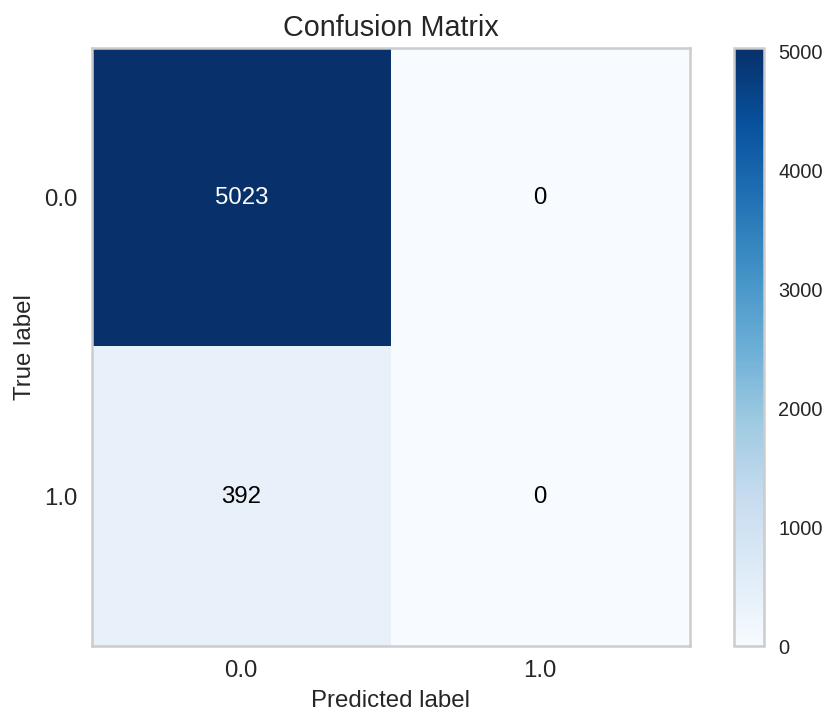

In [127]:
# Logistic Regression result
skplt.metrics.plot_confusion_matrix(y_test, lr_pred);

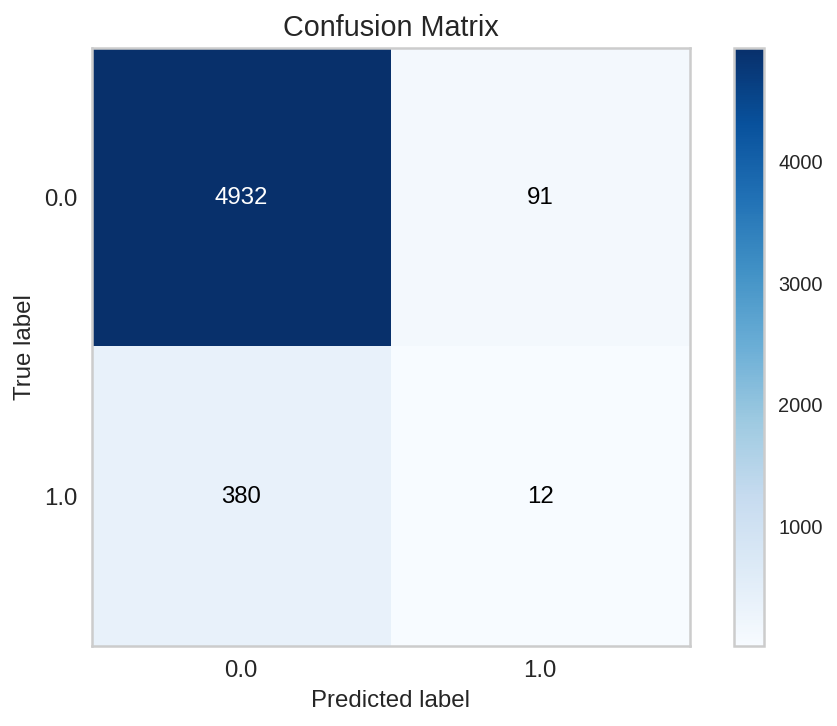

In [128]:
# KNN result
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

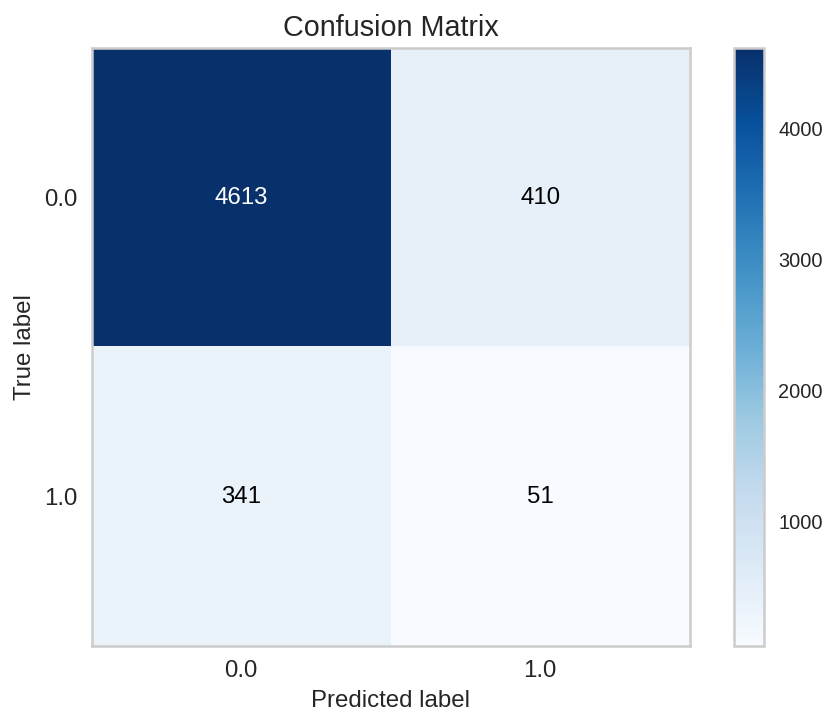

In [129]:
# Decision Tree result
skplt.metrics.plot_confusion_matrix(y_test, dtree_pred);

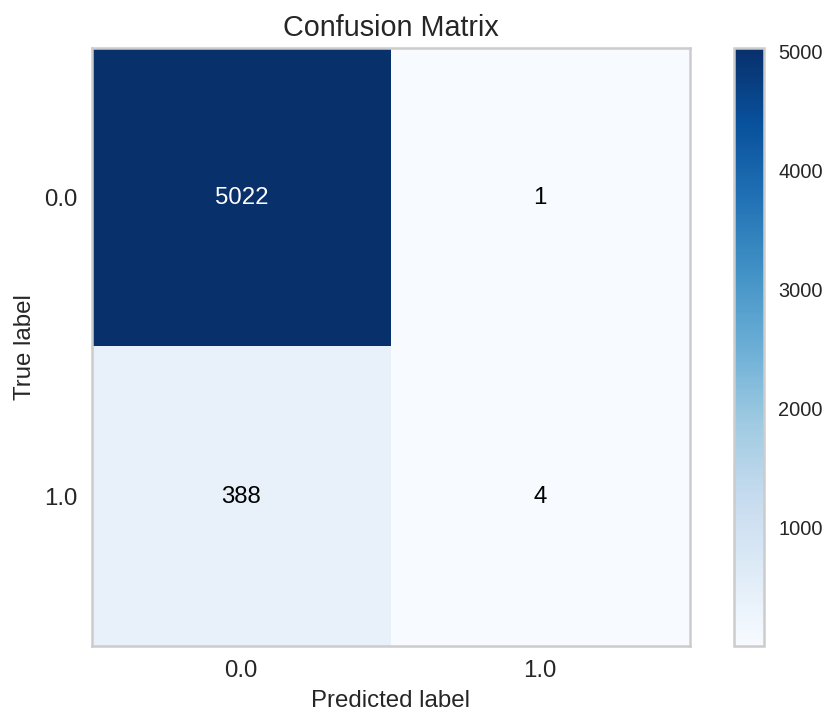

In [130]:
# random forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

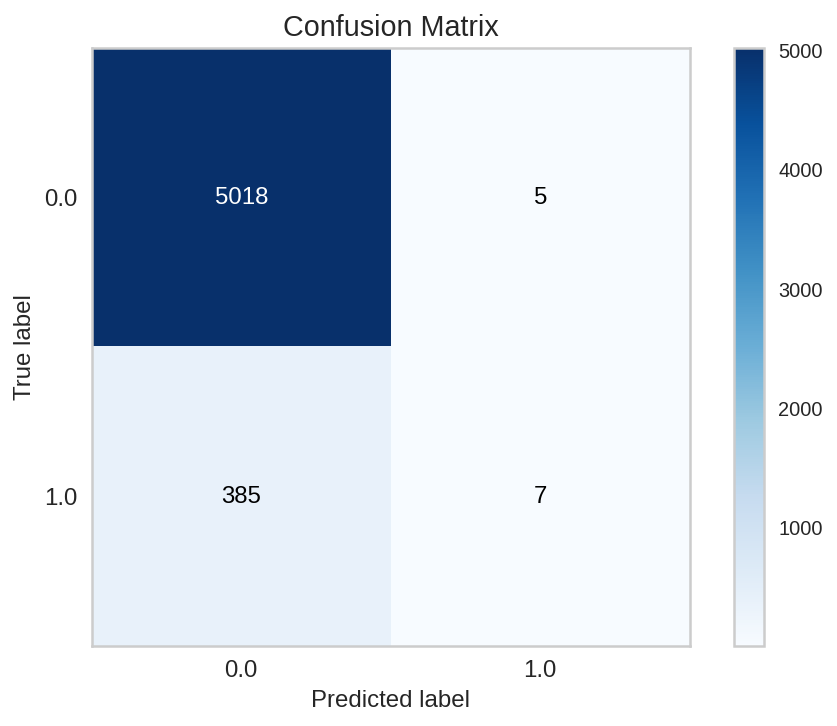

In [131]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

### ROC-AUC

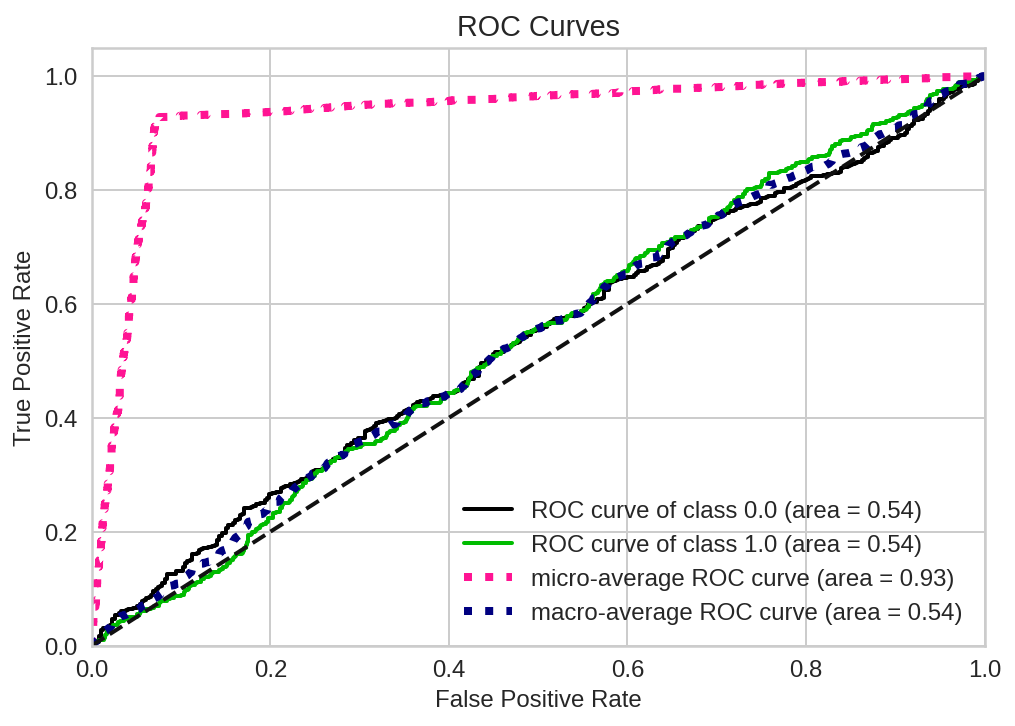

In [132]:
# Log result
skplt.metrics.plot_roc_curve(y_test, lr_pred_proba);

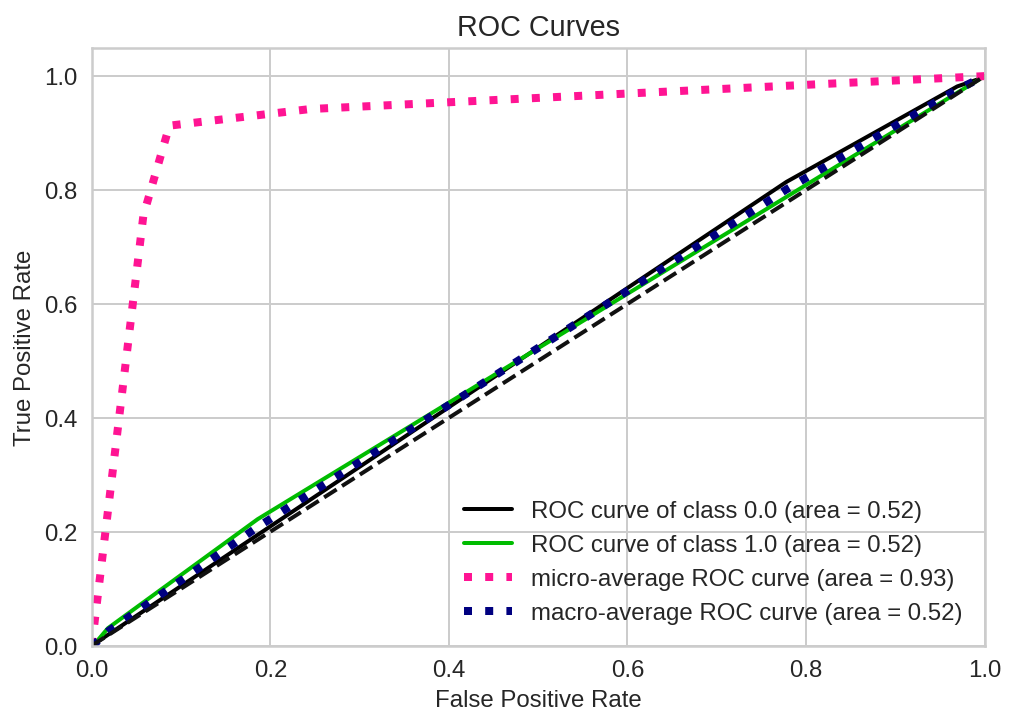

In [133]:
# KNN result
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

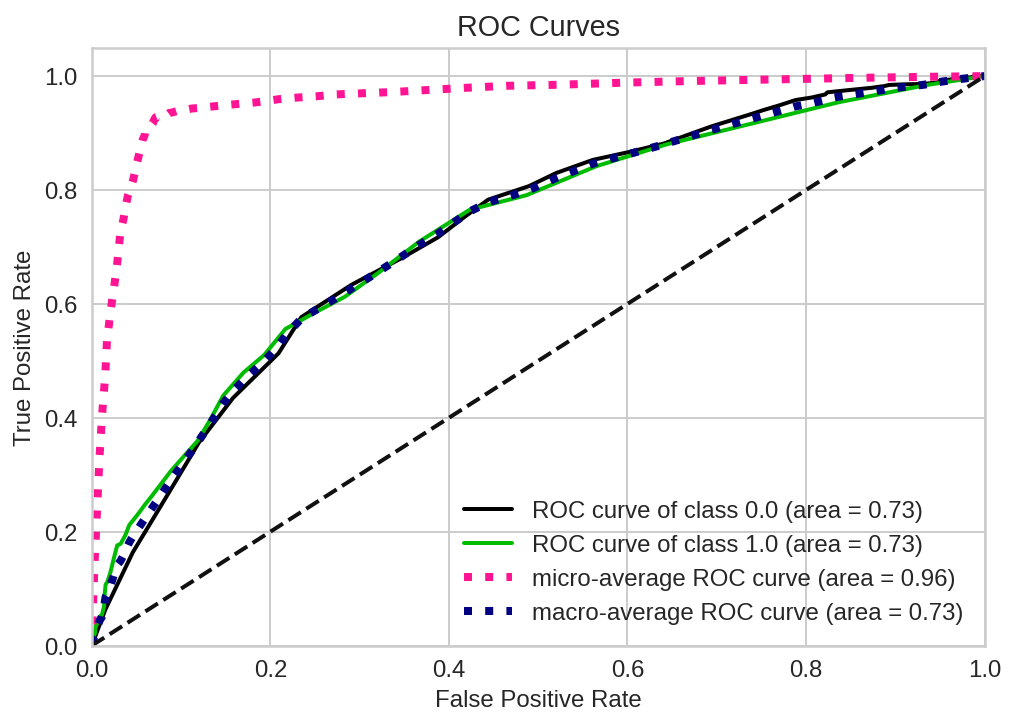

In [134]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

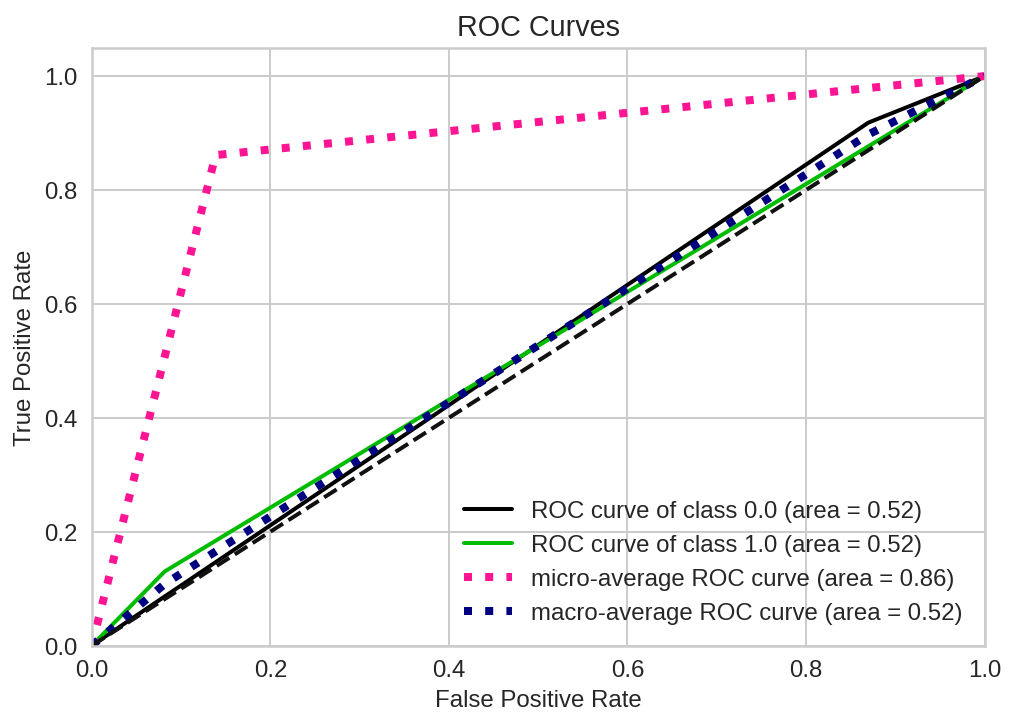

In [135]:
# Decision Tree perceptron result
skplt.metrics.plot_roc_curve(y_test, dtree_pred_proba);

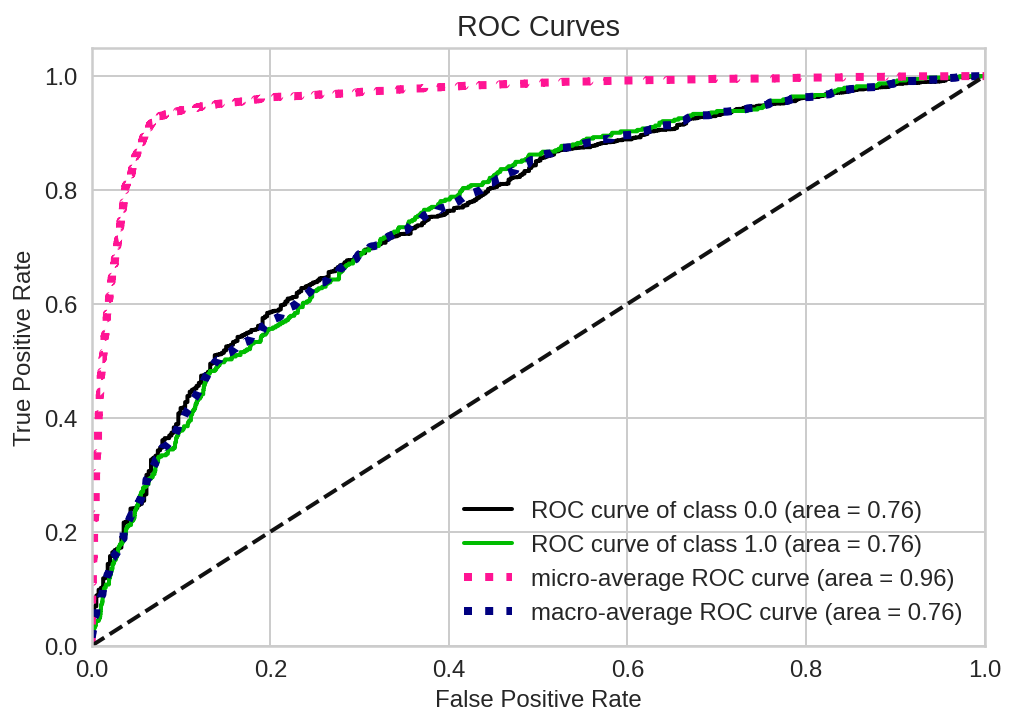

In [136]:
# XGBoost perceptron result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

### AOC Score

In [137]:
# check LogReg f1-score
metrics.roc_auc_score(y_test, lr_pred)

0.5

In [138]:
# check KNN f1-score
metrics.roc_auc_score(y_test, knn_pred)

0.5062477907746813

In [139]:
# check Decision Tree f1-score
metrics.roc_auc_score(y_test, dtree_pred)

0.5242387568206657

In [140]:
# check Random Forest f1-score
metrics.roc_auc_score(y_test, rf_pred)

0.5050024987100156

In [141]:
# check XGBoost f1-score
metrics.roc_auc_score(y_test, xgb_pred)

0.5084308608970166

### Precision

In [142]:
# check LogReg f1-score
metrics.precision_score(y_test, lr_pred)

0.0

In [143]:
# check KNN f1-score
metrics.precision_score(y_test, knn_pred)

0.11650485436893204

In [144]:
# check Decision Tree f1-score
metrics.precision_score(y_test, dtree_pred)

0.11062906724511931

In [145]:
# check Random Forest f1-score
metrics.precision_score(y_test, rf_pred)

0.8

In [146]:
# check XGBoost f1-score
metrics.precision_score(y_test, xgb_pred)

0.5833333333333334

### Recall

In [147]:
# check LogReg f1-score
metrics.recall_score(y_test, lr_pred)

0.0

In [148]:
# check KNN f1-score
metrics.recall_score(y_test, knn_pred)

0.030612244897959183

In [149]:
# check Decision Tree f1-score
metrics.recall_score(y_test, dtree_pred)

0.13010204081632654

In [150]:
# check Random Forest f1-score
metrics.recall_score(y_test, rf_pred)

0.01020408163265306

In [151]:
# check XGBoost f1-score
metrics.recall_score(y_test, xgb_pred)

0.017857142857142856

### F1-Score

In [152]:
# check LogReg f1-score
metrics.f1_score(y_test, lr_pred)

0.0

In [153]:
# check KNN f1-score
metrics.f1_score(y_test, knn_pred)

0.048484848484848485

In [154]:
# check Decision Tree f1-score
metrics.f1_score(y_test, dtree_pred)

0.11957796014067996

In [155]:
# check Random Forest f1-score
metrics.f1_score(y_test, rf_pred)

0.020151133501259442

In [156]:
# check XGBoost f1-score
metrics.f1_score(y_test, xgb_pred)

0.03465346534653465

# Imbalanced Modelling using G-Means

## Logistic Regression

In [157]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.08266808097163844, G-Mean=0.5317952934916924


### New Prediction

In [158]:
# change predict proba result to optimized one using new threshold
new_pred_result = (lr_pred_proba[:,1] >= thresholds[ix]).astype(int)

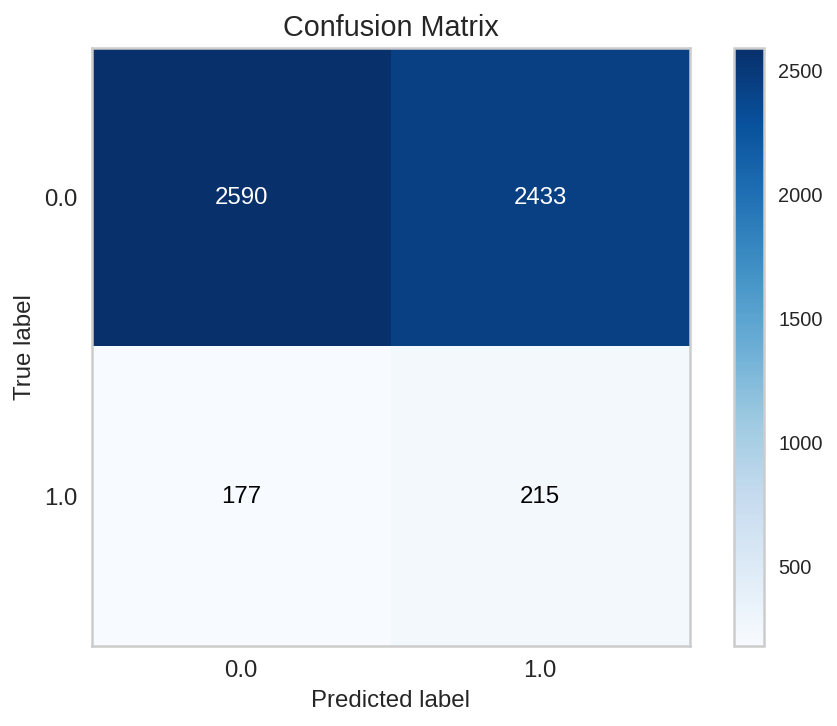

In [159]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [160]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.5320487492229622

In [161]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.08119335347432025

In [162]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.548469387755102

In [163]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.14144736842105265

In [164]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.936032    0.081193  0.518006     0.508613      0.874149
recall        0.515628    0.548469  0.518006     0.532049      0.518006
f1-score      0.664955    0.141447  0.518006     0.403201      0.627058
support    5023.000000  392.000000  0.518006  5415.000000   5415.000000

### Old Prediction

In [165]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, lr_pred)

0.5

In [166]:
# check old precision
metrics.precision_score(y_test, lr_pred)

0.0

In [167]:
# check old recall
metrics.recall_score(y_test, lr_pred)

0.0

In [168]:
# compare to the old f1 score
metrics.f1_score(y_test, lr_pred)

0.0

In [169]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, lr_pred, target_names=['0','1'], output_dict=True))

0      1  accuracy    macro avg  weighted avg
precision     0.927608    0.0  0.927608     0.463804      0.860458
recall        1.000000    0.0  0.927608     0.500000      0.927608
f1-score      0.962445    0.0  0.927608     0.481222      0.892772
support    5023.000000  392.0  0.927608  5415.000000   5415.000000

## K-Nearest Neighbors

In [170]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.3333333333333333, G-Mean=0.425105435232779


### New Prediction

In [171]:
# change predict proba result to optimized one using new threshold
new_pred_result = (knn_pred_proba[:,1] >= thresholds[ix]).astype(int)

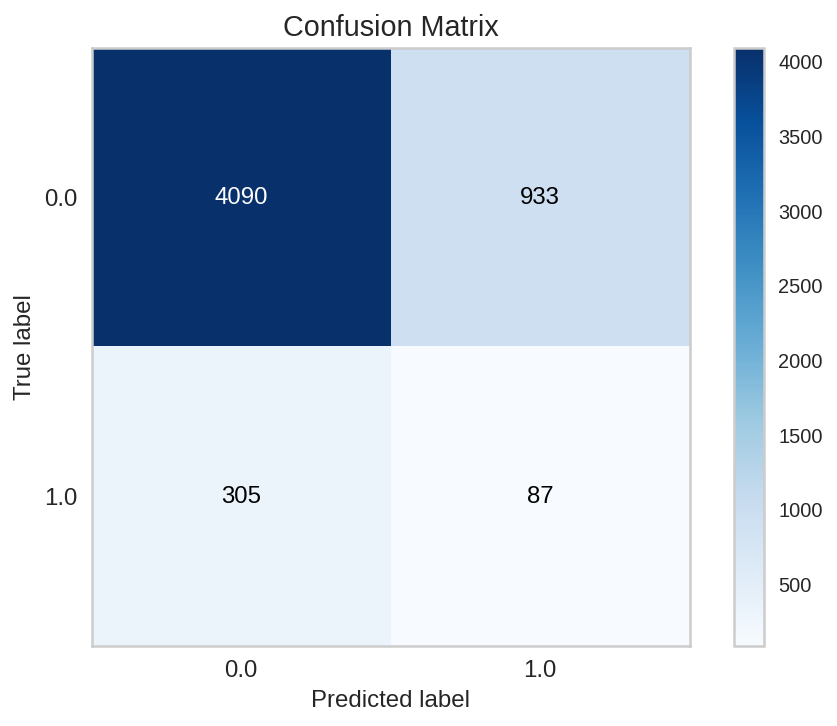

In [172]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [173]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.5180966025669674

In [174]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.08529411764705883

In [175]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.22193877551020408

In [176]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.12322946175637395

In [177]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.930603    0.085294  0.771376     0.507949      0.869410
recall        0.814254    0.221939  0.771376     0.518097      0.771376
f1-score      0.868550    0.123229  0.771376     0.495890      0.814595
support    5023.000000  392.000000  0.771376  5415.000000   5415.000000

### Old Prediction

In [178]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, lr_pred)

0.5

In [179]:
# check old precision
metrics.precision_score(y_test, knn_pred)

0.11650485436893204

In [180]:
# check old recall
metrics.recall_score(y_test, knn_pred)

0.030612244897959183

In [181]:
# compare to the old f1 score
metrics.f1_score(y_test, knn_pred)

0.048484848484848485

In [182]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.928464    0.116505  0.913019     0.522484      0.869685
recall        0.981883    0.030612  0.913019     0.506248      0.913019
f1-score      0.954427    0.048485  0.913019     0.501456      0.888844
support    5023.000000  392.000000  0.913019  5415.000000   5415.000000

## Decision Tree

In [183]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, dtree_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=1.0, G-Mean=0.3456624411911019


In [184]:
# change predict proba result to optimized one using new threshold
new_pred_result = (dtree_pred_proba[:,1] >= thresholds[ix]).astype(int)

### New Prediction

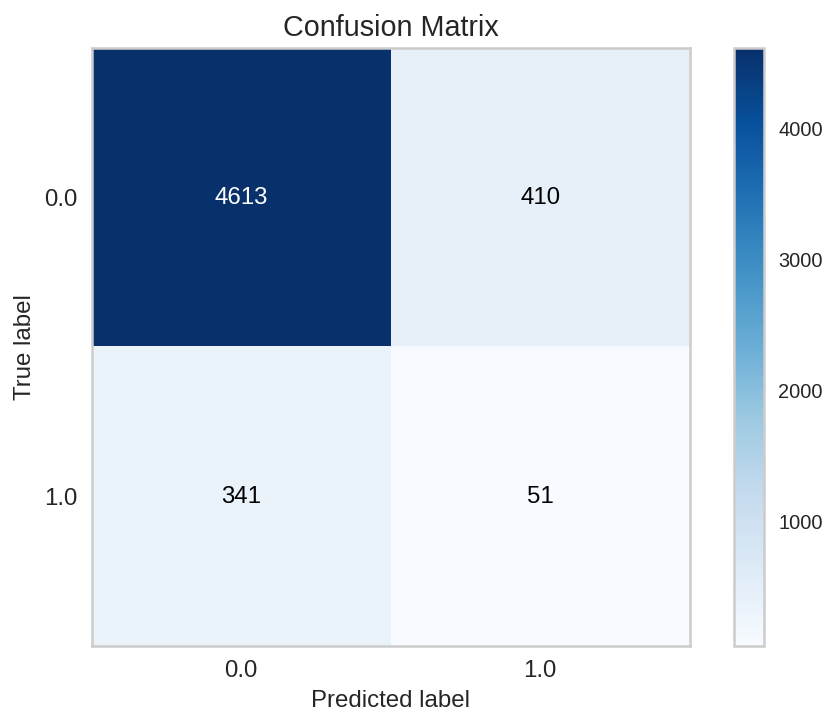

In [185]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [186]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.5242387568206657

In [187]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.11062906724511931

In [188]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.13010204081632654

In [189]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.11957796014067996

In [190]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.931167    0.110629  0.861311     0.520898      0.871767
recall        0.918375    0.130102  0.861311     0.524239      0.861311
f1-score      0.924727    0.119578  0.861311     0.522152      0.866441
support    5023.000000  392.000000  0.861311  5415.000000   5415.000000

### Old Prediction

In [191]:
# check old f1-score
metrics.roc_auc_score(y_test, dtree_pred)

0.5242387568206657

In [192]:
# check old precision
metrics.precision_score(y_test, dtree_pred)

0.11062906724511931

In [193]:
# check old recall
metrics.recall_score(y_test, dtree_pred)

0.13010204081632654

In [194]:
# compare to the old f1 score
metrics.f1_score(y_test, dtree_pred)

0.11957796014067996

In [195]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, dtree_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.931167    0.110629  0.861311     0.520898      0.871767
recall        0.918375    0.130102  0.861311     0.524239      0.861311
f1-score      0.924727    0.119578  0.861311     0.522152      0.866441
support    5023.000000  392.000000  0.861311  5415.000000   5415.000000

## Random Forest

In [196]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.08, G-Mean=0.6702670389032225


In [197]:
# change predict proba result to optimized one using new threshold
new_pred_result = (rf_pred_proba[:,1] >= thresholds[ix]).astype(int)

### New Prediction

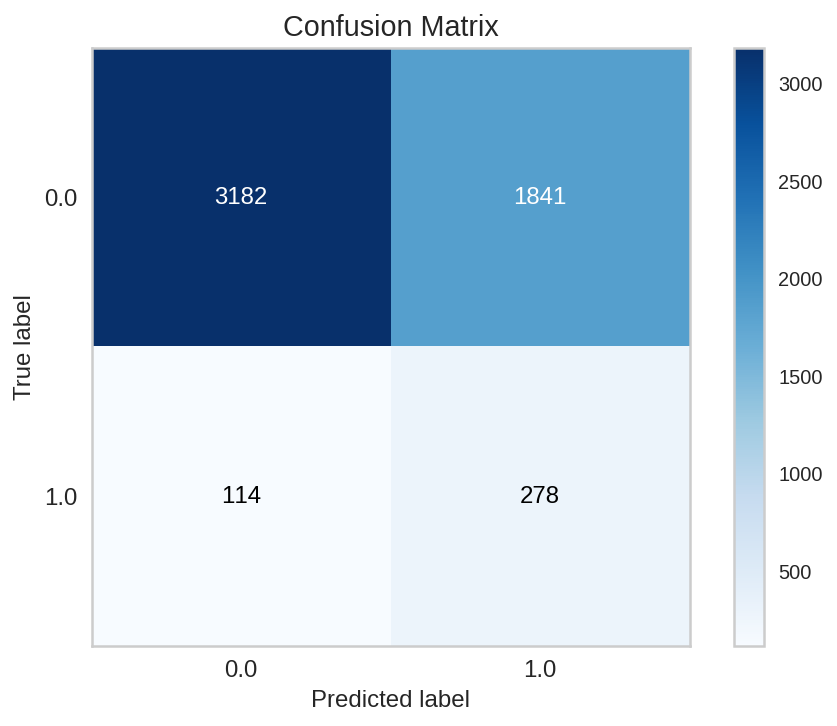

In [198]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [199]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.671334819016199

In [200]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.13119395941481832

In [201]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.7091836734693877

In [202]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.2214257268020709

In [203]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.965413    0.131194  0.638966     0.548303      0.905022
recall        0.633486    0.709184  0.638966     0.671335      0.638966
f1-score      0.764996    0.221426  0.638966     0.493211      0.725646
support    5023.000000  392.000000  0.638966  5415.000000   5415.000000

### Old Prediction

In [204]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, rf_pred)

0.5050024987100156

In [205]:
# check old precision
metrics.precision_score(y_test, rf_pred)

0.8

In [206]:
# check old recall
metrics.recall_score(y_test, rf_pred)

0.01020408163265306

In [207]:
# compare to the old f1 score
metrics.f1_score(y_test, rf_pred)

0.020151133501259442

In [208]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.928281    0.800000  0.928163     0.864140      0.918995
recall        0.999801    0.010204  0.928163     0.505002      0.928163
f1-score      0.962714    0.020151  0.928163     0.491433      0.894481
support    5023.000000  392.000000  0.928163  5415.000000   5415.000000

## XGBoost

In [209]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.06953836977481842, G-Mean=0.6951300774928743


In [210]:
# change predict proba result to optimized one using new threshold
new_pred_result = (xgb_pred_proba[:,1] >= thresholds[ix]).astype(int)

### New Prediction

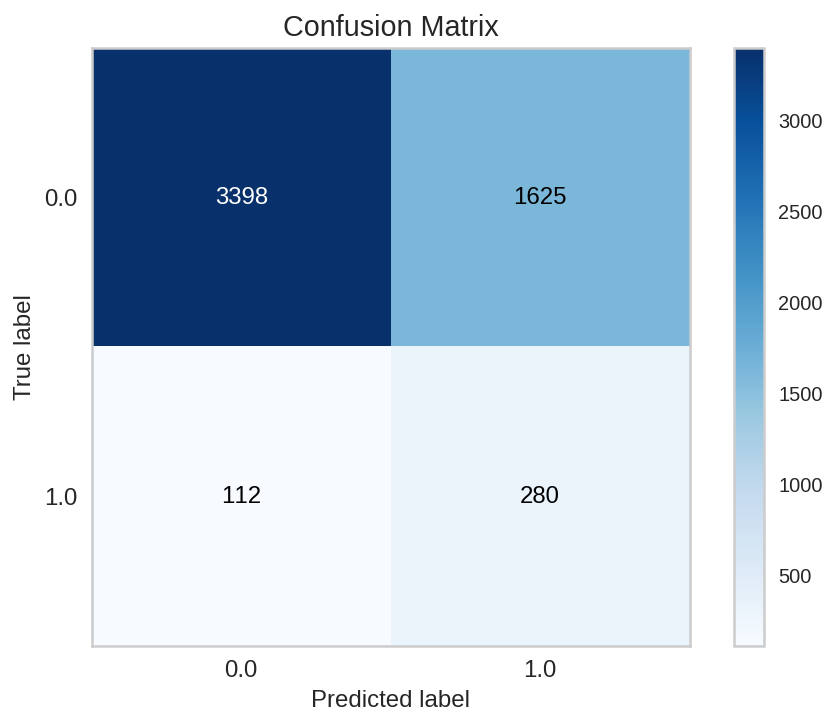

In [211]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [212]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.6953869343875319

In [213]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.14698162729658792

In [214]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.7142857142857143

In [215]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.24379625598606877

In [216]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.968091    0.146982  0.679224     0.557536      0.908650
recall        0.676488    0.714286  0.679224     0.695387      0.679224
f1-score      0.796437    0.243796  0.679224     0.520117      0.756431
support    5023.000000  392.000000  0.679224  5415.000000   5415.000000

### Old Prediction

In [217]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, xgb_pred)

0.5084308608970166

In [218]:
# check old precision
metrics.precision_score(y_test, xgb_pred)

0.5833333333333334

In [219]:
# check old recall
metrics.recall_score(y_test, xgb_pred)

0.017857142857142856

In [220]:
# compare to the old f1 score
metrics.f1_score(y_test, xgb_pred)

0.03465346534653465

In [221]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.928743    0.583333  0.927978     0.756038      0.903739
recall        0.999005    0.017857  0.927978     0.508431      0.927978
f1-score      0.962594    0.034653  0.927978     0.498623      0.895419
support    5023.000000  392.000000  0.927978  5415.000000   5415.000000

# Agnostics Model

### Variable Importance - Partial Dependence Plot

In [222]:
## initiate explainer for the best model
churn_exp = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 21660 rows 20 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 21660 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f99283fa320> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.076, max = 0.9
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.29, mean = -0.00362, max = 0.49
  -> model_info        : package sklearn

A new explainer has been created!


In [226]:
# visualize permutation feature importance for the best model
churn_exp.model_parts().plot()

In [224]:
# create partial dependence plot of XGBoost model
churn_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


# Business Evaluation Metrics

### Gain Cumulative Curve

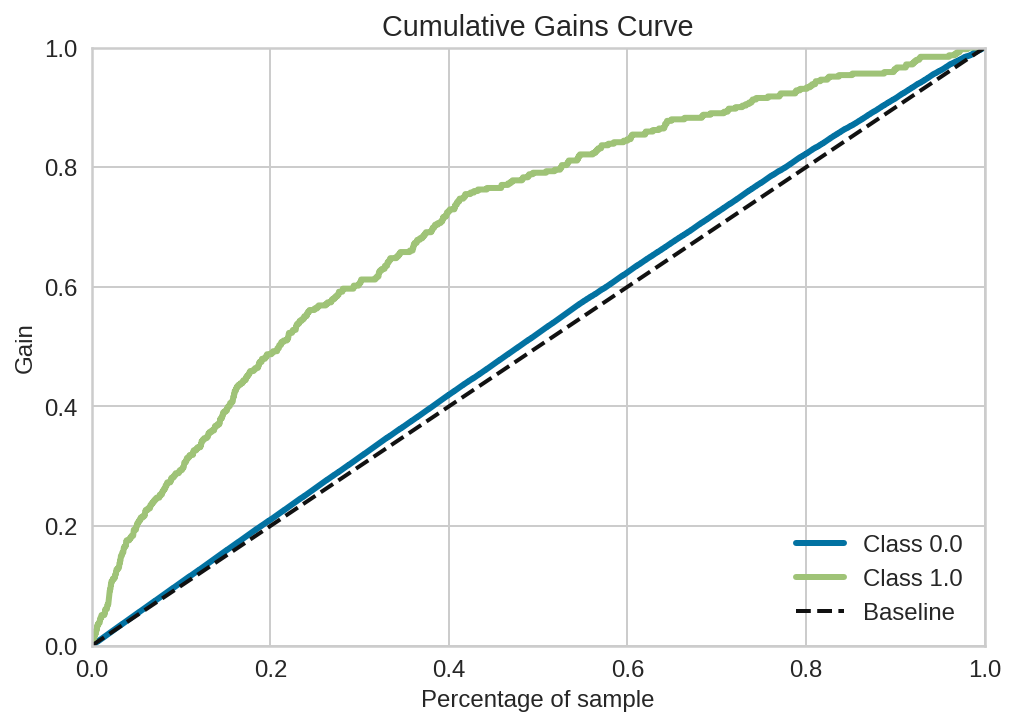

In [227]:
skplt.metrics.plot_cumulative_gain(y_test, rf_pred_proba)

### Lift Curve

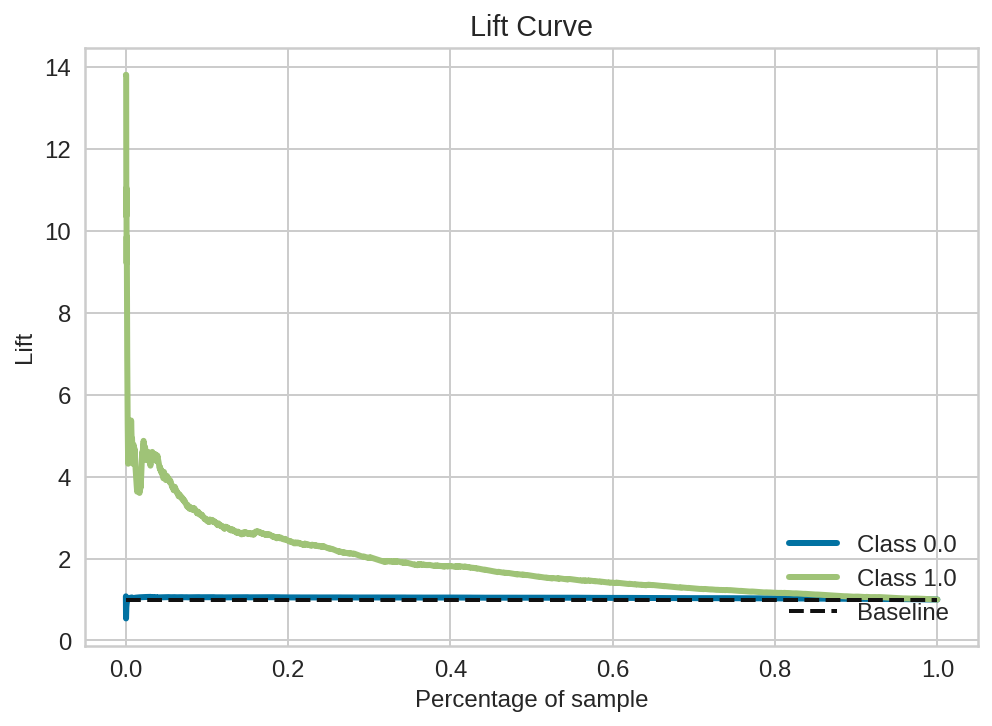

In [228]:
skplt.metrics.plot_lift_curve(y_test, rf_pred_proba)

### Profit Curve

In [241]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    print(profits)
    # Profit curve plot
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f} per user'.format(model_name, max_profit))


In [242]:
# create cost benefit matrix
costbenefit_mat = np.array([[0, -10000],
                            [0, 30000 - 10000]])

In [243]:
# check cost benefit matrix
costbenefit_mat

array([[     0, -10000],
       [     0,  20000]])

In [244]:
# check model confusion matrix
metrics.confusion_matrix(y_test, rf_pred)

array([[5022,    1],
       [ 388,    4]])

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()

# rf_params
rf_params = {
    'n_estimators': [10, 50, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,10,'None'],
    'max_features': ['sqrt', 'log2']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=rf_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [239]:
# assign the best estimator to new variable
tree_best = grid_search.best_estimator_

[0.0, -1.8467220683287164, 1.8467220683287164, 5.54016620498615, 3.693444136657433, 1.8467220683287164, 5.54016620498615, 9.233610341643583, 12.927054478301015, 11.0803324099723, 14.773776546629731, 12.927054478301015, 16.62049861495845, 14.773776546629731, 18.467220683287167, 22.1606648199446, 20.313942751615883, 18.467220683287167, 22.1606648199446, 25.85410895660203, 24.007386888273317, 27.700831024930746, 25.85410895660203, 24.007386888273317, 22.1606648199446, 20.313942751615883, 18.467220683287167, 16.62049861495845, 14.773776546629731, 18.467220683287167, 16.62049861495845, 14.773776546629731, 12.927054478301015, 11.0803324099723, 14.773776546629731, 12.927054478301015, 11.0803324099723, 9.233610341643583, 12.927054478301015, 16.62049861495845, 14.773776546629731, 12.927054478301015, 16.62049861495845, 14.773776546629731, 12.927054478301015, 11.0803324099723, 9.233610341643583, 7.386888273314866, 5.54016620498615, 3.693444136657433, 1.8467220683287164, 0.0, -1.8467220683287164, 

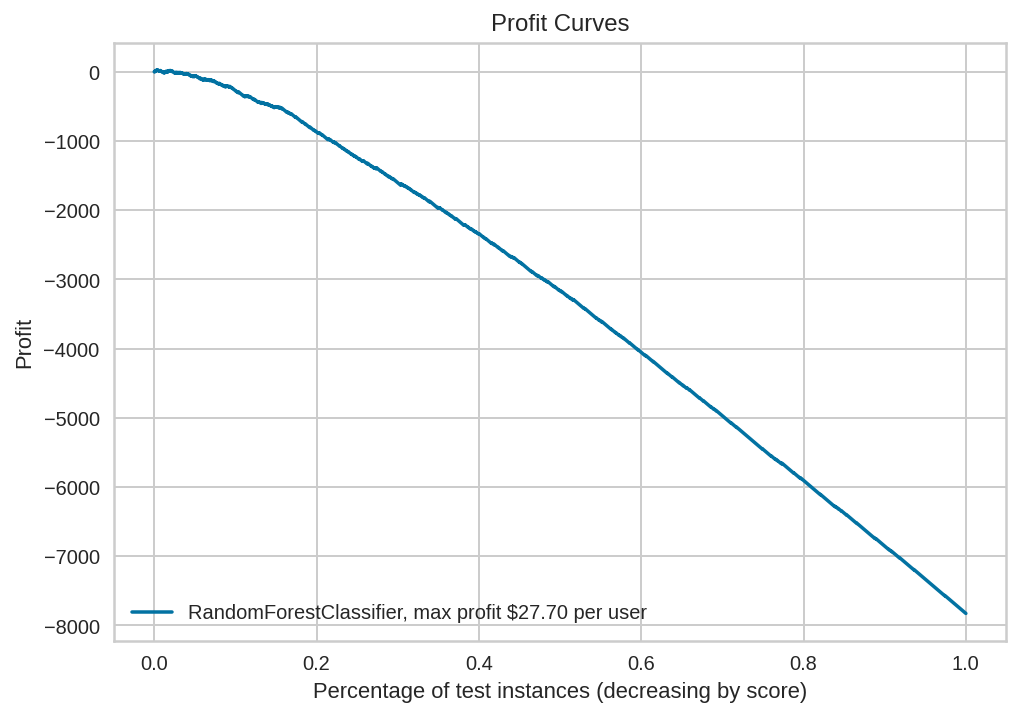

In [240]:
plot_profit_curve(tree_best,costbenefit_mat, xgb_pred_proba[:,1], y_test)
plt.xlabel('Percentage of test instances (decreasing by score)')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend(loc='lower left')
plt.show()